# Hypothesis 3

Find non-linear regression and classification models with best hyperparameters.

1. Rename this notebook from `H3.ipynb` to `3_{Name}_{Surname}.ipynb`
2. You should use dataset from `H1`: `1_{Name}_{Surname}.csv` and `1_{Name}_{Surname}_test.csv` files
2. Fit 6 nonlinear models for regression target `__price_doc`: Decision Tree, Random Forest, Hist Gradient Boosting (scikit-learn), LightGBM, XGBoost, CatBoost
    - Find optimal hyperparameters coefficient for each model (select more than 10+ experiments for each model)
3. Fit 6 nonlinear models models for target `__churn`: Decision Tree, Random Forest, Hist Gradient Boosting (scikit-learn), LightGBM, XGBoost, CatBoost
    - Find optimal hyperparameters coefficient for each model (select more than 10+ experiments for each model)
4. Fill table below with result obtained in experiments (Please hold this table in the top of notebook)
5. The results of the best models should be saved in the following columns:
    - best_regression_model.predict(): `__price_predict`
    - best_classification_model.predict_proba(): `__churn_prob`
    - algorithm: `__priority`
6. Send this notebook and preprocessed test dataset in a private message in telegram.

## HOW ESTIMATE QUALITY and SELECT BEST MODEL (Step by step guide)

- Select one target and work with it, then repeat this procedure with another target
- For each model and hyperparameters estimate quality (see the pseudo-code below)
```python
# Fit your model on train (NOT train_all) and score on valid dataset
model = ...some model...
model.fit(train.drop(list_targets, axis=1), y_train_...)

# Predict on train and valid
y_pred_train = model.predict(train) or predict_proba(train)[:, 1]
y_pred_valid = model.predict(valid) or predict_proba(valid)[:, 1]

# Estimate quality on train and valid
# Put this quality to table with metrics
score_train = metric_for_price or metric_for_churn(y_train_..., y_pred_train)
score_valid = metric_for_price or metric_for_churn(y_valid_..., y_pred_valid)
```
- Put metrics `score_train` and `score_valid` in table below for this model
- **Repeat this procedure more than 10+ experiments**
- Select BEST hyperparameters for EACH model and fill scores to table below
- Then, Select model with BEST score (based on `score_valid` metric) (for churn and price independently)
- Fit your BEST models on TRAIN_ALL dataset and predict on TEST (for churn and price independently)
```python
# Fit your BEST model on train_all (NOT train)
model = ...your BEST model...
model.fit(train_all.drop(list_targets, axis=1), y_train_all_...)

# Predict on train_all and TEST
train_all['__price_predict' or '__churn_prob'] = model.predict(train_all) or predict_proba(train_all)[:, 1]
test['__price_predict' or '__churn_prob'] = model.predict(test) or predict_proba(test)[:, 1]
```
- Send the `test` dataset in a private message before the deadline


## **IMPORTANT!!! `Name_Surname` should not change in other hypotheses**


## **IMPORTANT!!! Final Test dataset should have `3_{Name}_{Surname}_test.csv` name**


# Your metrics from experiments

In [1]:
import numpy as np
import pandas as pd

# table with metrics for all models
# Example:
# ('Decision Tree Classifier', '{depth=5, random_state=42}', 'metric_for_churn', 0.9210, 0.9164)

scoring = pd.DataFrame([
    # Regression
    ('Decision Tree', '{random_state= 42, max_depth= 6, min_samples_split = 20, min_samples_leaf = 20}', 'metric_for_price', -0.1480,  -0.1530),
    ('Random Forest', '{random_state = 47, max_depth= 14 ,min_samples_split=10, min_samples_leaf= 6}', 'metric_for_price', -0.0900, -0.1370),
    ('Hist Gradient Boosting', '{max_depth= 8, learning_rate= 0.1, min_samples_leaf= 16}', 'metric_for_price', -0.1150, -0.1370),
    ('LightGBM', '{random_state=47, max_depth= 8, learning_rate = 0.1, force_row_wise= True}', 'metric_for_price', -0.1090, -0.1360),
    ('XGBoost', '{random_state=47, learning_rate = 0.1}', 'metric_for_price', -0.0950, -0.1360),
    ('CatBoost', '{random_state=47, max_depth = 7, learning_rate = 0.05 }', 'metric_for_price',  -0.0790, -0.1340),
    # Classification
    ('Decision Tree', '{random_state= 47, max_depth=8, min_samples_split=20, min_samples_leaf=14 }', 'metric_for_churn', 0.8810, 0.8230),
    ('Random Forest', '{random_state= 47, max_depth=10, min_samples_split=8, min_samples_leaf=8 }', 'metric_for_churn', 0.8760, 0.8030),
    ('Hist Gradient Boosting', '{random_state= 47,max_depth=4, learning_rate= 0.05, l2_regularization= 0.05 }', 'metric_for_churn', 0.8910, 0.8530),
    ('LightGBM', '{random_state= 47, max_depth=4, learning_rate= 0.05 }', 'metric_for_churn', 0.8950, 0.8510),
    ('XGBoost', '{random_state= 47, max_depth=3, learning_rate = 0.1 }', 'metric_for_churn', 0.8930, 0.8560),
    ('CatBoost', '{max_depth=11, learning_rate= 0.05, iterations = 10} ', 'metric_for_churn', 0.8800, 0.8400),
], columns=['alg', 'hyperparametes', 'metric_name', 'score_train', 'score_test'])

scoring

alg                                     hyperparametes  \
0            Decision Tree  {random_state= 42, max_depth= 6, min_samples_s...   
1            Random Forest  {random_state = 47, max_depth= 14 ,min_samples...   
2   Hist Gradient Boosting  {max_depth= 8, learning_rate= 0.1, min_samples...   
3                 LightGBM  {random_state=47, max_depth= 8, learning_rate ...   
4                  XGBoost             {random_state=47, learning_rate = 0.1}   
5                 CatBoost  {random_state=47, max_depth = 7, learning_rate...   
6            Decision Tree  {random_state= 47, max_depth=8, min_samples_sp...   
7            Random Forest  {random_state= 47, max_depth=10, min_samples_s...   
8   Hist Gradient Boosting  {random_state= 47,max_depth=4, learning_rate= ...   
9                 LightGBM  {random_state= 47, max_depth=4, learning_rate=...   
10                 XGBoost  {random_state= 47, max_depth=3, learning_rate ...   
11                CatBoost  {max_depth=11, learning_rate= 0.05, iterations...   

         metric_name  score_train  score_test  
0   metric_for_price       -0.148      -0.153  
1   metric_for_price       -0.090      -0.137  
2   metric_for_price       -0.115      -0.137  
3   metric_for_price       -0.109      -0.136  
4   metric_for_price       -0.095      -0.136  
5   metric_for_price       -0.079      -0.134  
6   metric_for_churn        0.881       0.823  
7   metric_for_churn        0.876       0.803  
8   metric_for_churn        0.891       0.853  
9   metric_for_churn        0.895       0.851  
10  metric_for_churn        0.893       0.856  
11  metric_for_churn        0.880       0.840

In [2]:
#mount my google drive file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 1000

# Your Name Surname
# !!! should not change in other hypotheses
NAME = "Belton_Manhica"

train_all = pd.read_csv(f"/content/drive/MyDrive/Machine Learning data/1_{NAME}_train.csv")
test = pd.read_csv(f"/content/drive/MyDrive/Machine Learning data/1_{NAME}_test.csv")

TRAIN_SHAPE, TEST_SHAPE = train_all.shape, test.shape
TRAIN_SHAPE, TEST_SHAPE

((20483, 128), (9183, 127))

In [ ]:
list_targets = ['__price_doc', '__churn']
X_train_price = train[INPUT_FEATURES_CHURN]
X_valid_prince = valid[INPUT_FEATURES_PRICE]
train_all_prince = train_all[train_all]
test_price = test[INPUT_FEATURES_PRICE]

X_train_churn = train[INPUT_FEATURES_CHURN]
X_valid_churn  = valid[INPUT_FEATURES_CHURN]
train_all_churn  = train_all[INPUT_FEATURES_CHURN]
test_churn  = test[INPUT_FEATURES_CHURN]

## Split TRAIN_ALL dataset into 2 parts: TRAIN and VALID (validation)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_percentage_error


def metric_for_price(y_true, y_pred):
    """ mean_squared_log_error. bigger is better """
    return round(-mean_squared_log_error(y_true=y_true, y_pred=y_pred), 3)


def metric_for_churn(y_true, y_score):
    """ roc_auc_score. bigger is better """
    return round(roc_auc_score(y_true=y_true, y_score=y_score), 3)


RANDOM_STATE = 42
train, valid = train_test_split(train_all, test_size=0.5, stratify=train_all['__churn'], random_state=RANDOM_STATE)
train.shape, valid.shape, test.shape

((10241, 128), (10242, 128), (9183, 127))

In [5]:
list_targets = ['__price_doc', '__churn']

y_train_churn = train['__churn']
y_valid_churn = valid['__churn']
y_train_all_churn = train_all['__churn']

y_train_price = train['__price_doc']
y_valid_price = valid['__price_doc']
y_train_all_price = train_all['__price_doc']

# YOUR WORK STARTS HERE

In [6]:
#select continuous features
continuous_features = list(set(train.dtypes[train.dtypes != 'object'].index.tolist())
                        - set(['__churn','__price_doc', 'Unnamed: 0'] ))

continuous_features

['customer_age',
 'f_big_market_raion_yes',
 'f_radiation_raion_yes',
 'f_railroad_1line_yes',
 'f_thermal_power_plant_raion_no',
 'f_build_count_mix',
 'f_1_dependent_count',
 'leisure_count_3000',
 'f_1_detention_facility_km',
 'build_count_wood',
 'f_cafe_sum_1000_min_price_avg',
 'f_1_full_sq',
 'f_1_sport_count_2000',
 'total_ct_chng_q4_q1',
 'dependent_count',
 'f_income_category_target___price_doc',
 'months_inactive_12_mon',
 'f_culture_objects_top_25_no',
 'build_year',
 'f_nuclear_reactor_raion_yes',
 'f_1_leisure_count_5000',
 'f_card_category_target___price_doc',
 'f_1_school_education_centers_top_20_raion',
 'build_count_mix',
 'f_railroad_terminal_raion_no',
 'f_oil_chemistry_raion_yes',
 'f_culture_objects_top_25_yes',
 'office_sqm_5000',
 'f_product_type_target___churn',
 'total_revolving_bal',
 'market_count_1500',
 'railroad_station_walk_km',
 'num_room',
 'contacts_count_12_mon',
 'f_timestamp_target___churn',
 'f_1_months_on_book',
 'f_1_total_revolving_bal',
 'mkad

In [7]:
#Select the right feature Matrix

X_train = train[[col for col in continuous_features if col.startswith('f_')]]
X_valid = valid[[ col for col in continuous_features if col.startswith('f_')]]
X_train_all = train_all[[col for col in continuous_features if col.startswith('f_')]]

X_test = test[[col for col in continuous_features if col.startswith('f_')]]



In [ ]:
#create a list of tuples for the train and validation datasets

get_X_y = [
    ('train', X_train, train),
    ('valid', X_valid, valid)
]

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

#select the train data and validation datasets
Train, X_train, y_train = get_X_y[0]
Valid, X_valid, y_valid = get_X_y[1]

#create an empty list to store max_depth the parameter values
max_depth = []

#crearte an empty dictionary to store the scores
MSLE_scores = {'train':[], 'valid': []}

#create a range for the hyperparameters max_depth
for k in range(2,22,2):
  # display each max_depth value:
    print(f'Max Depth: {k}')

    #build the tree
    DT_reg = DecisionTreeRegressor(random_state= 42, max_depth= k)

#add max_depth values to the list
    max_depth.append(k)

    #fit the model
    DT_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= DT_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores['train'].append(score_train)

#do the same for the validation set
    value_for_valid= DT_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

Max Depth: 2
Train_MSLE: -0.1900
Valid_MSLE: -0.1910


Max Depth: 4
Train_MSLE: -0.1600
Valid_MSLE: -0.1620


Max Depth: 6
Train_MSLE: -0.1470
Valid_MSLE: -0.1540


Max Depth: 8
Train_MSLE: -0.1310
Valid_MSLE: -0.1590


Max Depth: 10
Train_MSLE: -0.1110
Valid_MSLE: -0.1710


Max Depth: 12
Train_MSLE: -0.0880
Valid_MSLE: -0.1870


Max Depth: 14
Train_MSLE: -0.0620
Valid_MSLE: -0.2050


Max Depth: 16
Train_MSLE: -0.0410
Valid_MSLE: -0.2220


Max Depth: 18
Train_MSLE: -0.0260
Valid_MSLE: -0.2390


Max Depth: 20
Train_MSLE: -0.0160
Valid_MSLE: -0.2530




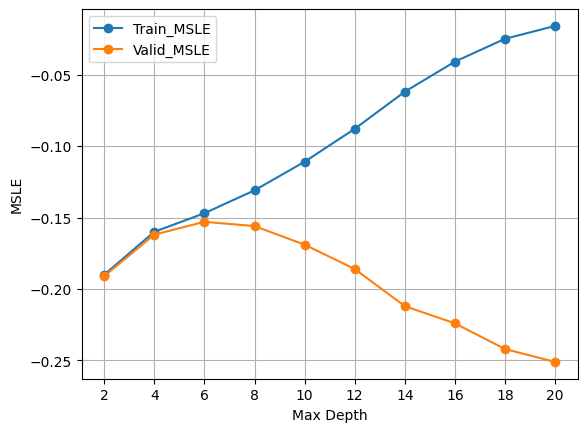

In [ ]:
#plot the scores for the train and validation datasets

plt.plot(max_depth, MSLE_scores['train'], label = 'Train_MSLE', marker='o' )
plt.plot(max_depth, MSLE_scores['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('Max Depth')
plt.ylabel('MSLE')
plt.xticks(max_depth)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#try different min_samples_split

#create an empty list to store min_samples_split the parameter values
min_samples_split = []

#crearte an empty dictionary to store the scores
MSLE_scores = {'train':[], 'valid': []}

#create a range for the hyperparameters min_samples_split
for k in range(2,22,2):
  # display each min_samples_split value:
    print(f'min_samples_split: {k}')

    #build the tree
    DT_reg = DecisionTreeRegressor(random_state= 42, min_samples_split= k)

#add min_samples_split values to the list
    min_samples_split.append(k)

    #fit the model
    DT_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= DT_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores['train'].append(score_train)

#do the same for the validation set
    value_for_valid= DT_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

min_samples_split: 2
Train_MSLE: -0.0000
Valid_MSLE: -0.2670


min_samples_split: 4
Train_MSLE: -0.0070
Valid_MSLE: -0.2620


min_samples_split: 6
Train_MSLE: -0.0150
Valid_MSLE: -0.2470


min_samples_split: 8
Train_MSLE: -0.0260
Valid_MSLE: -0.2350


min_samples_split: 10
Train_MSLE: -0.0330
Valid_MSLE: -0.2260


min_samples_split: 12
Train_MSLE: -0.0380
Valid_MSLE: -0.2190


min_samples_split: 14
Train_MSLE: -0.0440
Valid_MSLE: -0.2130


min_samples_split: 16
Train_MSLE: -0.0480
Valid_MSLE: -0.2110


min_samples_split: 18
Train_MSLE: -0.0520
Valid_MSLE: -0.2070


min_samples_split: 20
Train_MSLE: -0.0570
Valid_MSLE: -0.2000




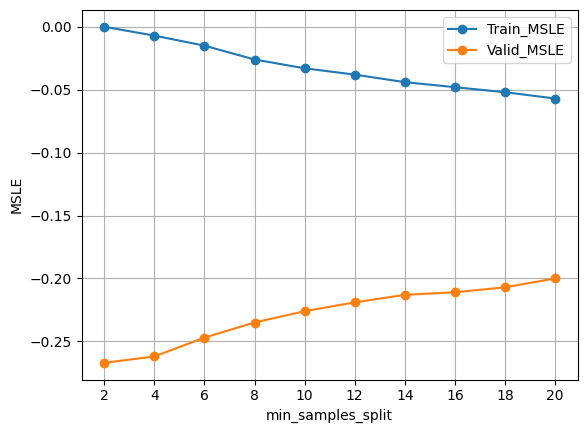

In [ ]:
plt.plot(min_samples_split, MSLE_scores['train'], label = 'Train_MSLE', marker='o' )
plt.plot(min_samples_split, MSLE_scores['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('min_samples_split')
plt.ylabel('MSLE')
plt.xticks(min_samples_split)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#try different min_samples_leaf values

#create an empty list to store min_samples_leaf the parameter values
min_samples_leaf = []

#crearte an empty dictionary to store the scores
MSLE_scores = {'train':[], 'valid': []}

#create a range for the hyperparameters min_samples_leaf
for k in range(2,22,2):
  # display each min_samples_leaf value:
    print(f'min_samples_leaf: {k}')

    #build the tree
    DT_reg = DecisionTreeRegressor(random_state= 42, min_samples_leaf= k)

#add min_samples_leaf values to the list
    min_samples_leaf.append(k)

    #fit the model
    DT_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= DT_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores['train'].append(score_train)

#do the same for the validation set
    value_for_valid= DT_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

min_samples_leaf: 2
Train_MSLE: -0.0130
Valid_MSLE: -0.2560


min_samples_leaf: 4
Train_MSLE: -0.0460
Valid_MSLE: -0.2040


min_samples_leaf: 6
Train_MSLE: -0.0630
Valid_MSLE: -0.1910


min_samples_leaf: 8
Train_MSLE: -0.0770
Valid_MSLE: -0.1780


min_samples_leaf: 10
Train_MSLE: -0.0870
Valid_MSLE: -0.1700


min_samples_leaf: 12
Train_MSLE: -0.0950
Valid_MSLE: -0.1650


min_samples_leaf: 14
Train_MSLE: -0.0990
Valid_MSLE: -0.1620


min_samples_leaf: 16
Train_MSLE: -0.1040
Valid_MSLE: -0.1600


min_samples_leaf: 18
Train_MSLE: -0.1080
Valid_MSLE: -0.1580


min_samples_leaf: 20
Train_MSLE: -0.1130
Valid_MSLE: -0.1570




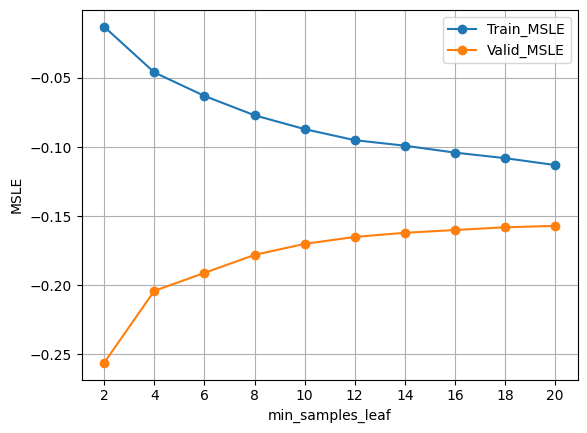

In [ ]:
plt.plot(min_samples_leaf, MSLE_scores['train'], label = 'Train_MSLE', marker='o' )
plt.plot(min_samples_leaf, MSLE_scores['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('min_samples_leaf')
plt.ylabel('MSLE')
plt.xticks(min_samples_leaf)
plt.grid()
plt.legend()
plt.show()

In [191]:
#Best decision tree Regressor

#select the training set
name, X_, y_ = get_X_y[0]

#build the tree
DT_reg = DecisionTreeRegressor(random_state= 42, max_depth= 6, min_samples_split = 20, min_samples_leaf = 20)


#fit the model
DT_reg.fit(X_, y_['__price_doc'])

for name, X_, y_ in get_X_y:
  value = DT_reg.predict(X_)
#convert all negative predictions to zero
  value[value < 0] = 0
#append the values of the prediction
  y_['__price_pedict_DT_reg'] = value

for name, X_, y_ in get_X_y:
  score = metric_for_price(y_true = y_['__price_doc'], y_pred = y_['__price_pedict_DT_reg'])
  print(f'{name:10s}: {score:.4f}')




train     : -0.1480
valid     : -0.1530


<Axes: >

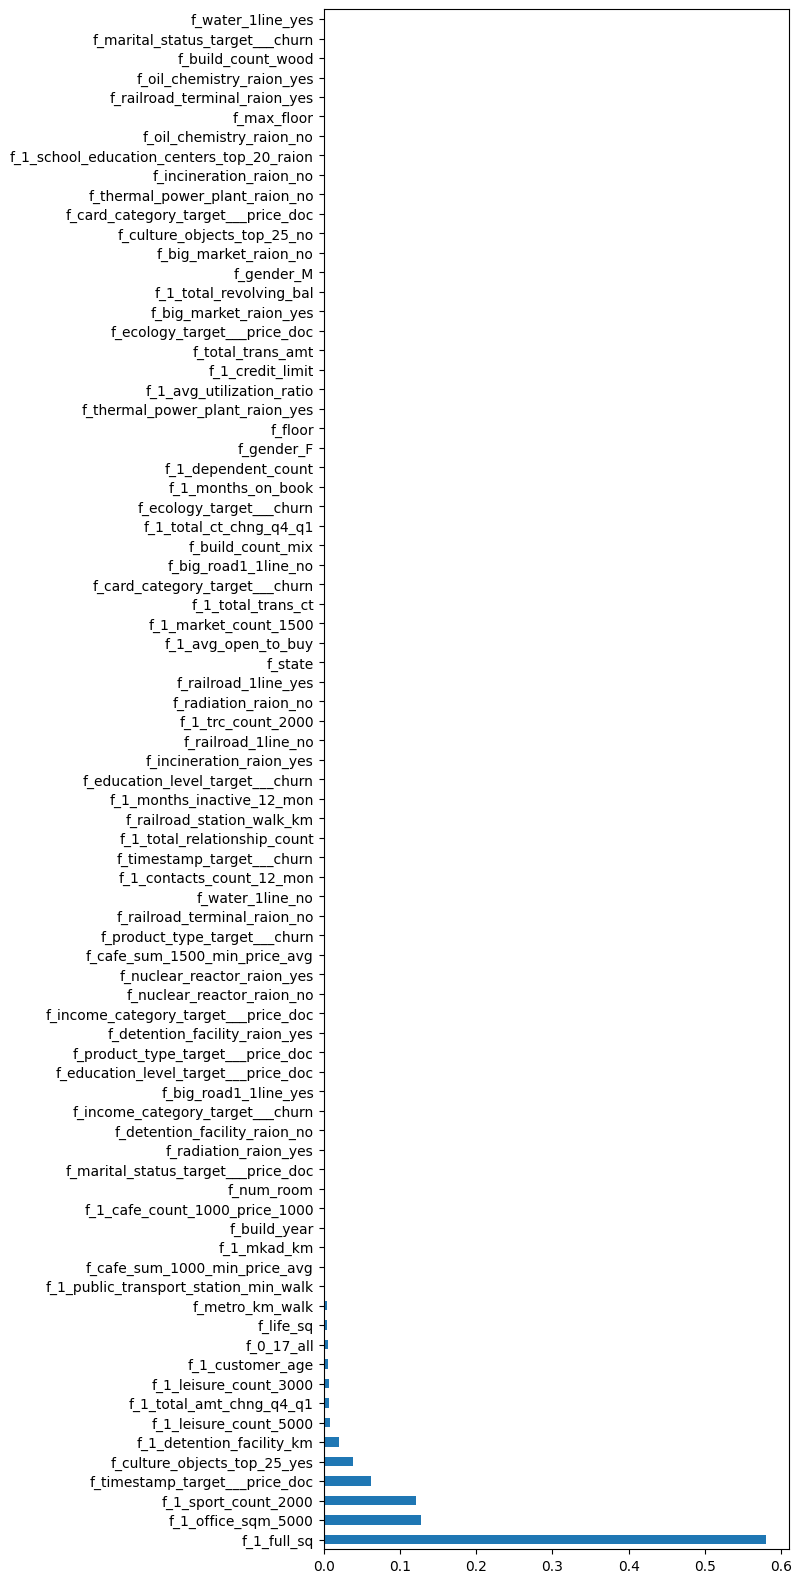

In [192]:
#Get feature importance
DT_importances = (pd.Series(DT_reg.feature_importances_, index = X_train.columns.tolist()).sort_values(ascending = False).round(4))
DT_importances.plot(kind = 'barh', figsize=(6, 20))

Random Forest

In [194]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#create an empty list to store max_depth the parameter values
max_depth = []

#crearte an empty dictionary to store the scores
MSLE_scores_r1 = {'train':[], 'valid': []}

#create a range for the hyperparameters max_depth
for k in range(2,22,2):
  # display each max_depth value:
    print(f'Max Depth: {k}')

    #build the tree
    RF_reg = RandomForestRegressor(random_state= 42, max_depth= k)

#add max_depth values to the list
    max_depth.append(k)

    #fit the model
    RF_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= RF_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_r1['train'].append(score_train)

#do the same for the validation set
    value_for_valid= RF_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_r1['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

Max Depth: 2
Train_MSLE: -0.1780
Valid_MSLE: -0.1780


Max Depth: 4
Train_MSLE: -0.1550
Valid_MSLE: -0.1540


Max Depth: 6
Train_MSLE: -0.1410
Valid_MSLE: -0.1470


Max Depth: 8
Train_MSLE: -0.1240
Valid_MSLE: -0.1430


Max Depth: 10
Train_MSLE: -0.1040
Valid_MSLE: -0.1400


Max Depth: 12
Train_MSLE: -0.0840
Valid_MSLE: -0.1390


Max Depth: 14
Train_MSLE: -0.0670
Valid_MSLE: -0.1390


Max Depth: 16
Train_MSLE: -0.0540
Valid_MSLE: -0.1380


Max Depth: 18
Train_MSLE: -0.0450
Valid_MSLE: -0.1380


Max Depth: 20
Train_MSLE: -0.0400
Valid_MSLE: -0.1370




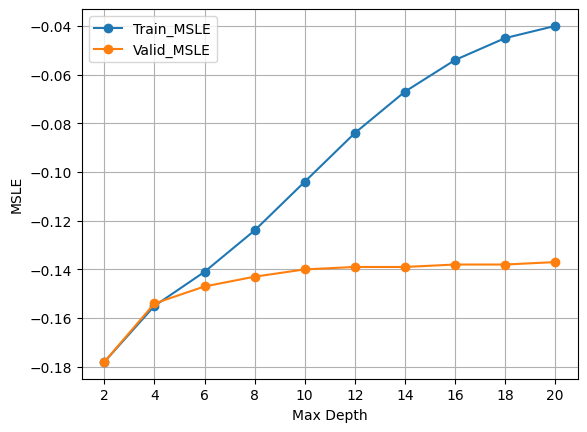

In [ ]:
#plot the scores for the train and validation datasets

plt.plot(max_depth, MSLE_scores_r1['train'], label = 'Train_MSLE', marker='o' )
plt.plot(max_depth, MSLE_scores_r1['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('Max Depth')
plt.ylabel('MSLE')
plt.xticks(max_depth)
plt.grid()
plt.legend()
plt.show()

In [ ]:

#create an empty list to store min_samples_split the parameter values
min_samples_split = []

#crearte an empty dictionary to store the scores
MSLE_scores_r2 = {'train':[], 'valid': []}

#create a range for the hyperparameters min_samples_split
for k in range(2,22,2):
  # display each min_samples_split value:
    print(f'min_samples_split: {k}')

    #build the forest
    RF_reg = RandomForestRegressor(random_state= 42, min_samples_split= k)

#add min_samples_split values to the list
    min_samples_split.append(k)

    #fit the model
    RF_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= RF_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_r2['train'].append(score_train)

#do the same for the validation set
    value_for_valid= RF_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_r2['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')



min_samples_split: 2
Train_MSLE: -0.0350
Valid_MSLE: -0.1370


min_samples_split: 4
Train_MSLE: -0.0390
Valid_MSLE: -0.1370


min_samples_split: 6
Train_MSLE: -0.0450
Valid_MSLE: -0.1370


min_samples_split: 8
Train_MSLE: -0.0500
Valid_MSLE: -0.1370


min_samples_split: 10
Train_MSLE: -0.0540
Valid_MSLE: -0.1370


min_samples_split: 12
Train_MSLE: -0.0590
Valid_MSLE: -0.1370


min_samples_split: 14
Train_MSLE: -0.0620
Valid_MSLE: -0.1380


min_samples_split: 16
Train_MSLE: -0.0660
Valid_MSLE: -0.1380


min_samples_split: 18
Train_MSLE: -0.0690
Valid_MSLE: -0.1380


min_samples_split: 20
Train_MSLE: -0.0720
Valid_MSLE: -0.1380




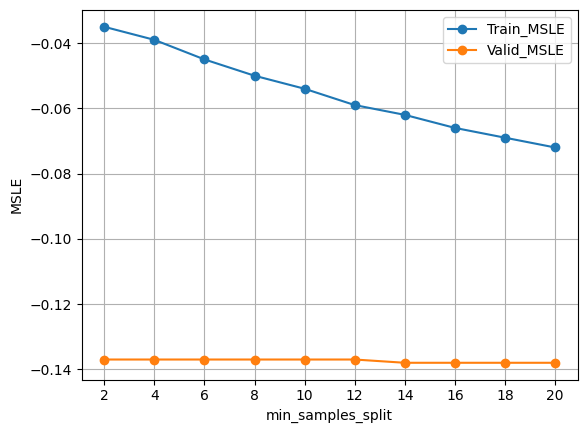

In [ ]:
plt.plot(min_samples_split, MSLE_scores_r2['train'], label = 'Train_MSLE', marker='o' )
plt.plot(min_samples_split, MSLE_scores_r2['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('min_samples_split')
plt.ylabel('MSLE')
plt.xticks(min_samples_split)
plt.grid()
plt.legend()
plt.show()

In [ ]:

#create an empty list to store min_samples_leaf the parameter values
min_samples_leaf = []

#crearte an empty dictionary to store the scores
MSLE_scores_r3 = {'train':[], 'valid': []}

#create a range for the hyperparameters min_samples_leaf
for k in range(2,22,2):
  # display each min_samples_leaf value:
    print(f'min_samples_leaf: {k}')

    #build the forest
    RF_reg = RandomForestRegressor(random_state= 42, min_samples_leaf= k)

#add min_samples_leaf values to the list
    min_samples_leaf.append(k)

    #fit the model
    RF_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= RF_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_r3['train'].append(score_train)

#do the same for the validation set
    value_for_valid= RF_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_r3['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

min_samples_leaf: 2
Train_MSLE: -0.0450
Valid_MSLE: -0.1370


min_samples_leaf: 4
Train_MSLE: -0.0650
Valid_MSLE: -0.1370


min_samples_leaf: 6
Train_MSLE: -0.0790
Valid_MSLE: -0.1370


min_samples_leaf: 8
Train_MSLE: -0.0890
Valid_MSLE: -0.1380


min_samples_leaf: 10
Train_MSLE: -0.0970
Valid_MSLE: -0.1380


min_samples_leaf: 12
Train_MSLE: -0.1030
Valid_MSLE: -0.1380


min_samples_leaf: 14
Train_MSLE: -0.1070
Valid_MSLE: -0.1390


min_samples_leaf: 16
Train_MSLE: -0.1110
Valid_MSLE: -0.1390


min_samples_leaf: 18
Train_MSLE: -0.1140
Valid_MSLE: -0.1400


min_samples_leaf: 20
Train_MSLE: -0.1160
Valid_MSLE: -0.1400




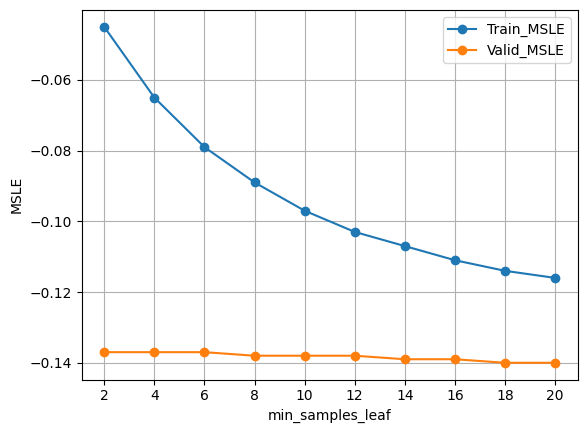

In [ ]:
plt.plot(min_samples_leaf, MSLE_scores_r3['train'], label = 'Train_MSLE', marker='o' )
plt.plot(min_samples_leaf, MSLE_scores_r3['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('min_samples_leaf')
plt.ylabel('MSLE')
plt.xticks(min_samples_leaf)
plt.grid()
plt.legend()
plt.show()

In [195]:
#Best Random Forest Regressor

#select the training data
name, X_, y_ = get_X_y[0]

#create a range for the hyperparameters max_depth and other

#build the forest
RF_reg = RandomForestRegressor(random_state = 47, max_depth= 14 ,min_samples_split=10, min_samples_leaf= 6)

#fit the model
RF_reg.fit(X_, y_['__price_doc'])

#make predictions
for name, X_, y_ in get_X_y:
  value = RF_reg.predict(X_)
 #convert all negative predictions to zero
  value[value < 0] = 0
    #append the values of the prediction
  y_['__price_pedict_RF_reg'] = value

for name, X_, y_ in get_X_y:
  score = metric_for_price(y_true = y_['__price_doc'], y_pred = y_['__price_pedict_RF_reg'])
  print(f'{name:10s}: {score:.4f}')

train     : -0.0900
valid     : -0.1370


<Axes: >

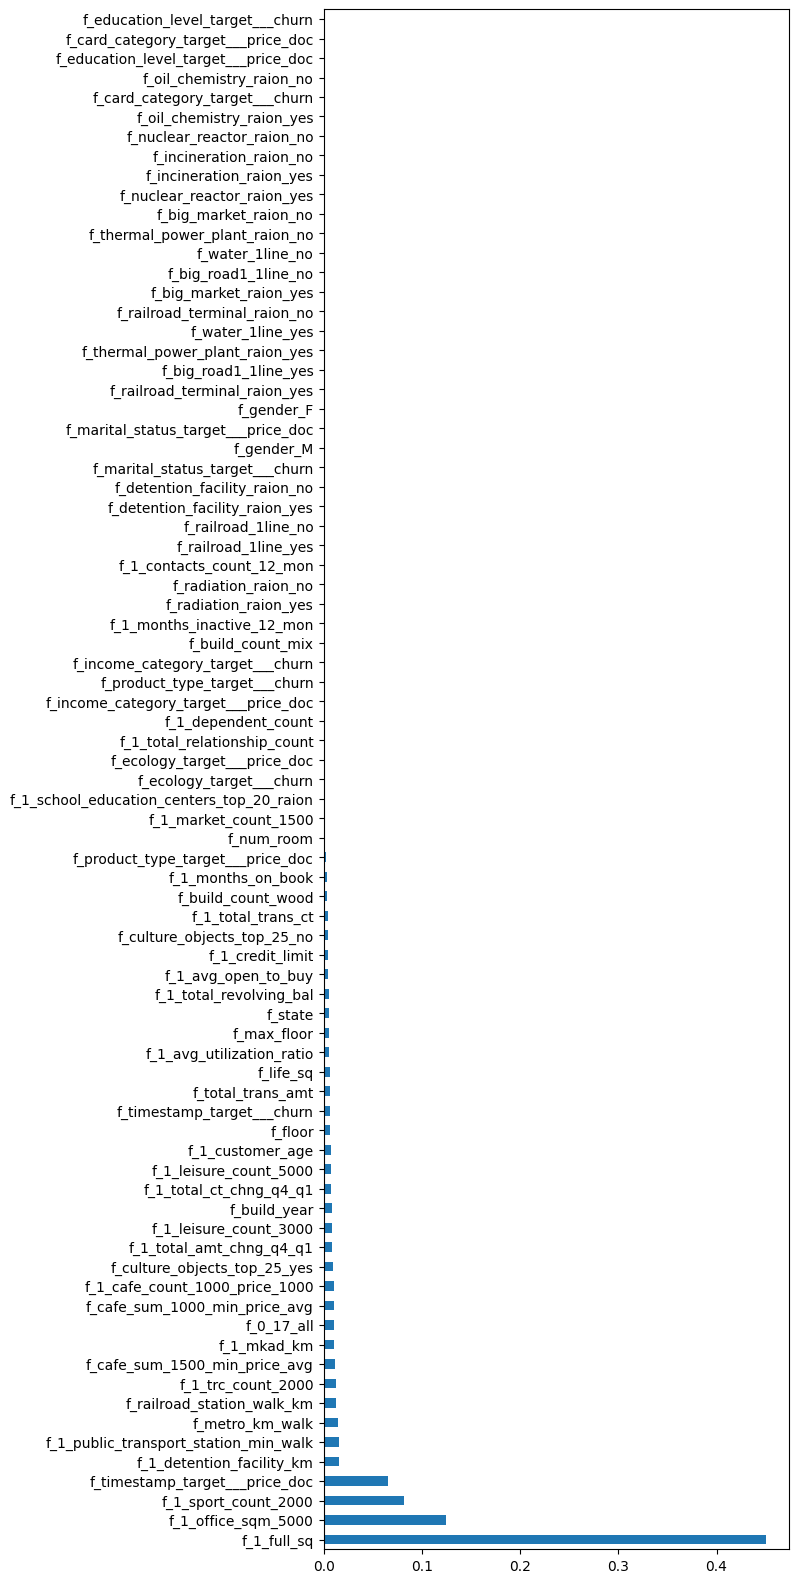

In [ ]:
#Get feature importance
RF_importances = (pd.Series(RF_reg.feature_importances_, index = X_train.columns.tolist()).sort_values(ascending = False).round(4))
RF_importances.plot(kind = 'barh', figsize=(6, 20))

Hist Gradient Boosting

See the difference between the valid - train to how much is overfeeting if zero its not overfitting

In [196]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
#create an empty list to store max_depth the parameter values
max_depth = []

#crearte an empty dictionary to store the scores
MSLE_scores_GB1 = {'train':[], 'valid': []}

#create a range for the hyperparameters max_depth
for k in range(2,22,2):
  # display each max_depth value:
    print(f'Max Depth: {k}')

    #build the tree
    GB_reg = HistGradientBoostingRegressor(max_depth= k)

#add max_depth values to the list
    max_depth.append(k)

    #fit the model
    GB_reg .fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= GB_reg .predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_GB1['train'].append(score_train)

#do the same for the validation set
    value_for_valid= GB_reg .predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_GB1['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

Max Depth: 2
Train_MSLE: -0.1430
Valid_MSLE: -0.1440


Max Depth: 4
Train_MSLE: -0.1360
Valid_MSLE: -0.1410


Max Depth: 6
Train_MSLE: -0.1220
Valid_MSLE: -0.1390


Max Depth: 8
Train_MSLE: -0.1210
Valid_MSLE: -0.1380


Max Depth: 10
Train_MSLE: -0.1140
Valid_MSLE: -0.1360


Max Depth: 12
Train_MSLE: -0.1160
Valid_MSLE: -0.1370


Max Depth: 14
Train_MSLE: -0.1150
Valid_MSLE: -0.1370


Max Depth: 16
Train_MSLE: -0.1240
Valid_MSLE: -0.1390


Max Depth: 18
Train_MSLE: -0.1060
Valid_MSLE: -0.1370


Max Depth: 20
Train_MSLE: -0.1130
Valid_MSLE: -0.1380




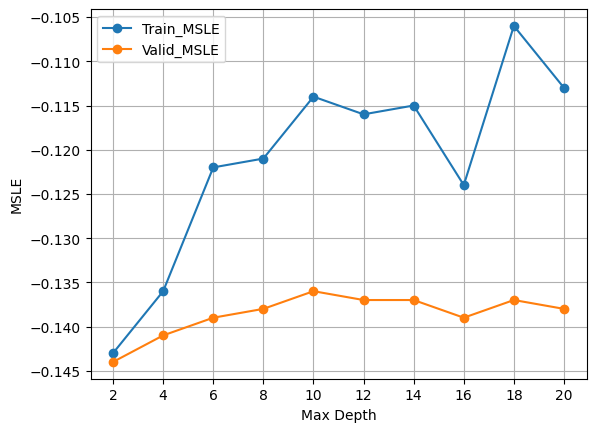

In [ ]:
#plot the scores for the train and validation datasets

plt.plot(max_depth, MSLE_scores_GB1['train'], label = 'Train_MSLE', marker='o' )
plt.plot(max_depth, MSLE_scores_GB1['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('Max Depth')
plt.ylabel('MSLE')
plt.xticks(max_depth)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#create an empty list to store learning_rate the parameter values
learning_rate = []

#crearte an empty dictionary to store the scores
MSLE_scores_GB2 = {'train':[], 'valid': []}

#create a range for the hyperparameters learning_rate
for k in [0.01, 0.05, 0.1, 0.5, 1.0, 1.1, 1.4, 1.5, 1.8, 2.0]:
  # display each learning_rate value:
    print(f'learning_rate: {k}')

    #build the forest
    GB_reg = HistGradientBoostingRegressor( learning_rate= k)

#add learning_rate values to the list
    learning_rate.append(k)

    #fit the model
    GB_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= GB_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_GB2['train'].append(score_train)

#do the same for the validation set
    value_for_valid= GB_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_GB2['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

learning_rate: 0.01
Train_MSLE: -0.1580
Valid_MSLE: -0.1620


learning_rate: 0.05
Train_MSLE: -0.1190
Valid_MSLE: -0.1370


learning_rate: 0.1
Train_MSLE: -0.1120
Valid_MSLE: -0.1380


learning_rate: 0.5
Train_MSLE: -0.1010
Valid_MSLE: -0.1500


learning_rate: 1.0
Train_MSLE: -0.1140
Valid_MSLE: -0.1800


learning_rate: 1.1
Train_MSLE: -0.1210
Valid_MSLE: -0.1920


learning_rate: 1.4
Train_MSLE: -0.1380
Valid_MSLE: -0.2450


learning_rate: 1.5
Train_MSLE: -0.1410
Valid_MSLE: -0.2810


learning_rate: 1.8
Train_MSLE: -0.1850
Valid_MSLE: -0.3090


learning_rate: 2.0
Train_MSLE: -0.3410
Valid_MSLE: -0.3670




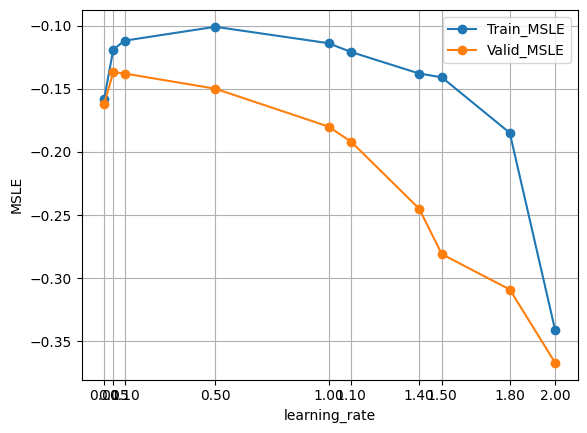

In [ ]:
plt.plot(learning_rate, MSLE_scores_GB2['train'], label = 'Train_MSLE', marker='o' )
plt.plot(learning_rate, MSLE_scores_GB2['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('learning_rate')
plt.ylabel('MSLE')
plt.xticks(learning_rate)
plt.grid()
plt.legend()
plt.show()

In [ ]:

#create an empty list to store min_samples_leaf the parameter values
min_samples_leaf = []

#crearte an empty dictionary to store the scores
MSLE_scores_GB3 = {'train':[], 'valid': []}

#create a range for the hyperparameters min_samples_leaf
for k in range(2,22,2):
  # display each min_samples_leaf value:
    print(f'min_samples_leaf: {k}')

    #build the forest
    GB_reg = HistGradientBoostingRegressor(random_state= 42, min_samples_leaf= k)

#add min_samples_leaf values to the list
    min_samples_leaf.append(k)

    #fit the model
    GB_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= GB_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_GB3['train'].append(score_train)

#do the same for the validation set
    value_for_valid= GB_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_GB3['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

min_samples_leaf: 2
Train_MSLE: -0.1170
Valid_MSLE: -0.1390


min_samples_leaf: 4
Train_MSLE: -0.1210
Valid_MSLE: -0.1390


min_samples_leaf: 6
Train_MSLE: -0.1200
Valid_MSLE: -0.1390


min_samples_leaf: 8
Train_MSLE: -0.1220
Valid_MSLE: -0.1400


min_samples_leaf: 10
Train_MSLE: -0.1200
Valid_MSLE: -0.1390


min_samples_leaf: 12
Train_MSLE: -0.1220
Valid_MSLE: -0.1390


min_samples_leaf: 14
Train_MSLE: -0.1220
Valid_MSLE: -0.1390


min_samples_leaf: 16
Train_MSLE: -0.1190
Valid_MSLE: -0.1380


min_samples_leaf: 18
Train_MSLE: -0.1150
Valid_MSLE: -0.1370


min_samples_leaf: 20
Train_MSLE: -0.1230
Valid_MSLE: -0.1390




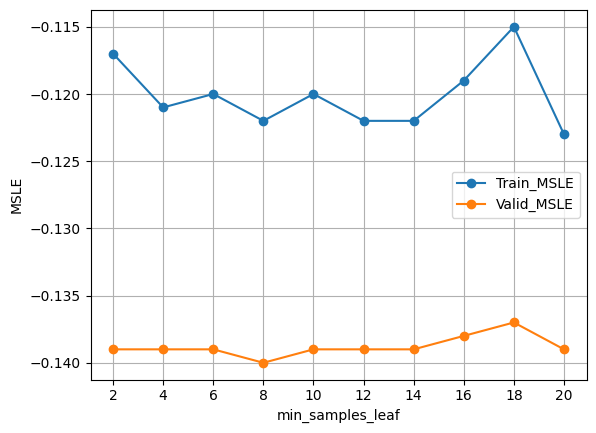

In [ ]:
plt.plot(min_samples_leaf, MSLE_scores_GB3['train'], label = 'Train_MSLE', marker='o' )
plt.plot(min_samples_leaf, MSLE_scores_GB3['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('min_samples_leaf')
plt.ylabel('MSLE')
plt.xticks(min_samples_leaf)
plt.grid()
plt.legend()
plt.show()

In [197]:
#Best model for Hist Gradient Boosting Regressor

#get training data
name, X_, y_ = get_X_y[0]

#build the model
GB_reg = HistGradientBoostingRegressor(max_depth= 8, learning_rate= 0.1, min_samples_leaf= 16)

#fit the model
GB_reg.fit(X_, y_['__price_doc'])

#make predictions
for name, X_, y_ in get_X_y:
  value = GB_reg.predict(X_)
 #convert all negative predictions to zero
  value[value < 0] = 0
    #append the values of the prediction
  y_['__price_pedict_GB_reg'] = value

for name, X_, y_ in get_X_y:
  score = metric_for_price(y_true = y_['__price_doc'], y_pred = y_['__price_pedict_GB_reg'])
  print(f'{name:10s}: {score:.4f}')


train     : -0.1180
valid     : -0.1380


LightGBM

In [198]:
from lightgbm import LGBMRegressor

In [ ]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

#create an empty list to store max_depth the parameter values
max_depth = []

#crearte an empty dictionary to store the scores
MSLE_scores_LGBM1 = {'train':[], 'valid': []}

#create a range for the hyperparameters max_depth
for k in range(2,22,2):
  # display each max_depth value:
    print(f'Max Depth: {k}')

    #build the tree
    LGBM_reg = LGBMRegressor(max_depth= k)

#add max_depth values to the list
    max_depth.append(k)

    #fit the model
    LGBM_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= LGBM_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_LGBM1['train'].append(score_train)

#do the same for the validation set
    value_for_valid= LGBM_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_LGBM1['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

Max Depth: 2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5570
[LightGBM] [Info] Number of data points in the train set: 10241, number of used features: 77
[LightGBM] [Info] Start training from score 6.785029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

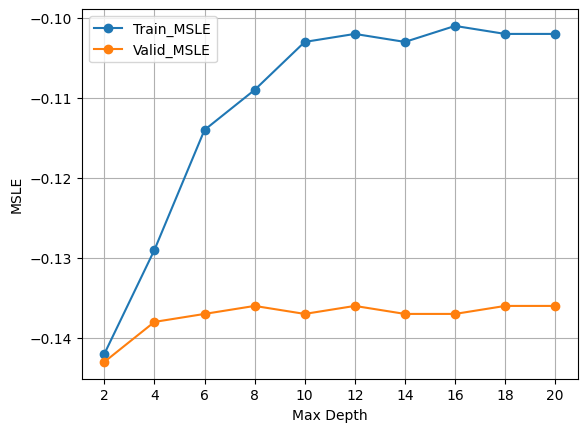

In [ ]:
plt.plot(max_depth, MSLE_scores_LGBM1['train'], label = 'Train_MSLE', marker='o' )
plt.plot(max_depth, MSLE_scores_LGBM1['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('Max Depth')
plt.ylabel('MSLE')
plt.xticks(max_depth)
plt.grid()
plt.legend()
plt.show()

In [ ]:

#create an empty list to store learning_rate the parameter values
learning_rate = []

#crearte an empty dictionary to store the scores
MSLE_scores_LGBM2 = {'train':[], 'valid': []}

#create a range for the hyperparameters learning_rate

for k in [0.01, 0.05, 0.1, 0.5, 1.0, 1.1, 1.4, 1.5, 1.8, 2.0]:
  # display each learning_rate value:
    print(f'learning_rate: {k}')

    #build the tree
    LGBM_reg = LGBMRegressor(random_state= 42, learning_rate = k, force_row_wise= True)

#add learning_rate values to the list
    learning_rate.append(k)

    #fit the model
    LGBM_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= LGBM_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_LGBM2['train'].append(score_train)

#do the same for the validation set
    value_for_valid= LGBM_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_LGBM2['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

learning_rate: 0.01
[LightGBM] [Info] Total Bins 5570
[LightGBM] [Info] Number of data points in the train set: 10241, number of used features: 77
[LightGBM] [Info] Start training from score 6.785029
Train_MSLE: -0.1570
Valid_MSLE: -0.1620


learning_rate: 0.05
[LightGBM] [Info] Total Bins 5570
[LightGBM] [Info] Number of data points in the train set: 10241, number of used features: 77
[LightGBM] [Info] Start training from score 6.785029
Train_MSLE: -0.1190
Valid_MSLE: -0.1370


learning_rate: 0.1
[LightGBM] [Info] Total Bins 5570
[LightGBM] [Info] Number of data points in the train set: 10241, number of used features: 77
[LightGBM] [Info] Start training from score 6.785029
Train_MSLE: -0.1020
Valid_MSLE: -0.1360


learning_rate: 0.5
[LightGBM] [Info] Total Bins 5570
[LightGBM] [Info] Number of data points in the train set: 10241, number of used features: 77
[LightGBM] [Info] Start training from score 6.785029
Train_MSLE: -0.0350
Valid_MSLE: -0.1610


learning_rate: 1.0
[LightGBM] [Inf

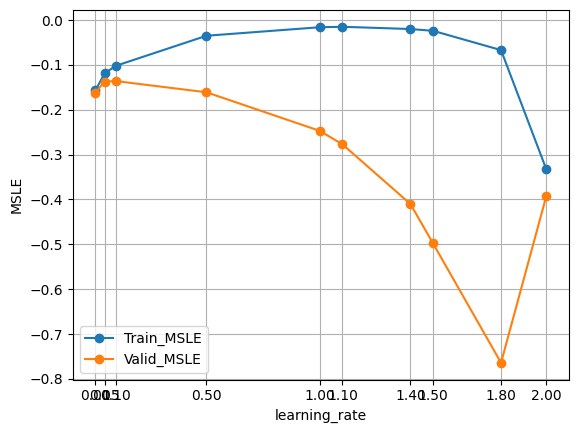

In [ ]:
plt.plot(learning_rate, MSLE_scores_LGBM2['train'], label = 'Train_MSLE', marker='o' )
plt.plot(learning_rate, MSLE_scores_LGBM2['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('learning_rate')
plt.ylabel('MSLE')
plt.xticks(learning_rate)
plt.grid()
plt.legend()
plt.show()

In [199]:
#Best model for LightGBM Regressor

#get training data
name, X_, y_ = get_X_y[0]

#build the model
LGBM_reg = LGBMRegressor(random_state=47, max_depth= 8, learning_rate = 0.1, force_row_wise= True)

#fit the model
LGBM_reg.fit(X_, y_['__price_doc'])

#make predictions
for name, X_, y_ in get_X_y:
  value = LGBM_reg.predict(X_)
 #convert all negative predictions to zero
  value[value < 0] = 0
    #append the values of the prediction
  y_['__price_pedict_LGBM_reg'] = value

for name, X_, y_ in get_X_y:
  score = metric_for_price(y_true = y_['__price_doc'], y_pred = y_['__price_pedict_LGBM_reg'])
  print(f'{name:10s}: {score:.4f}')


[LightGBM] [Info] Total Bins 5570
[LightGBM] [Info] Number of data points in the train set: 10241, number of used features: 77
[LightGBM] [Info] Start training from score 6.785029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

<Axes: >

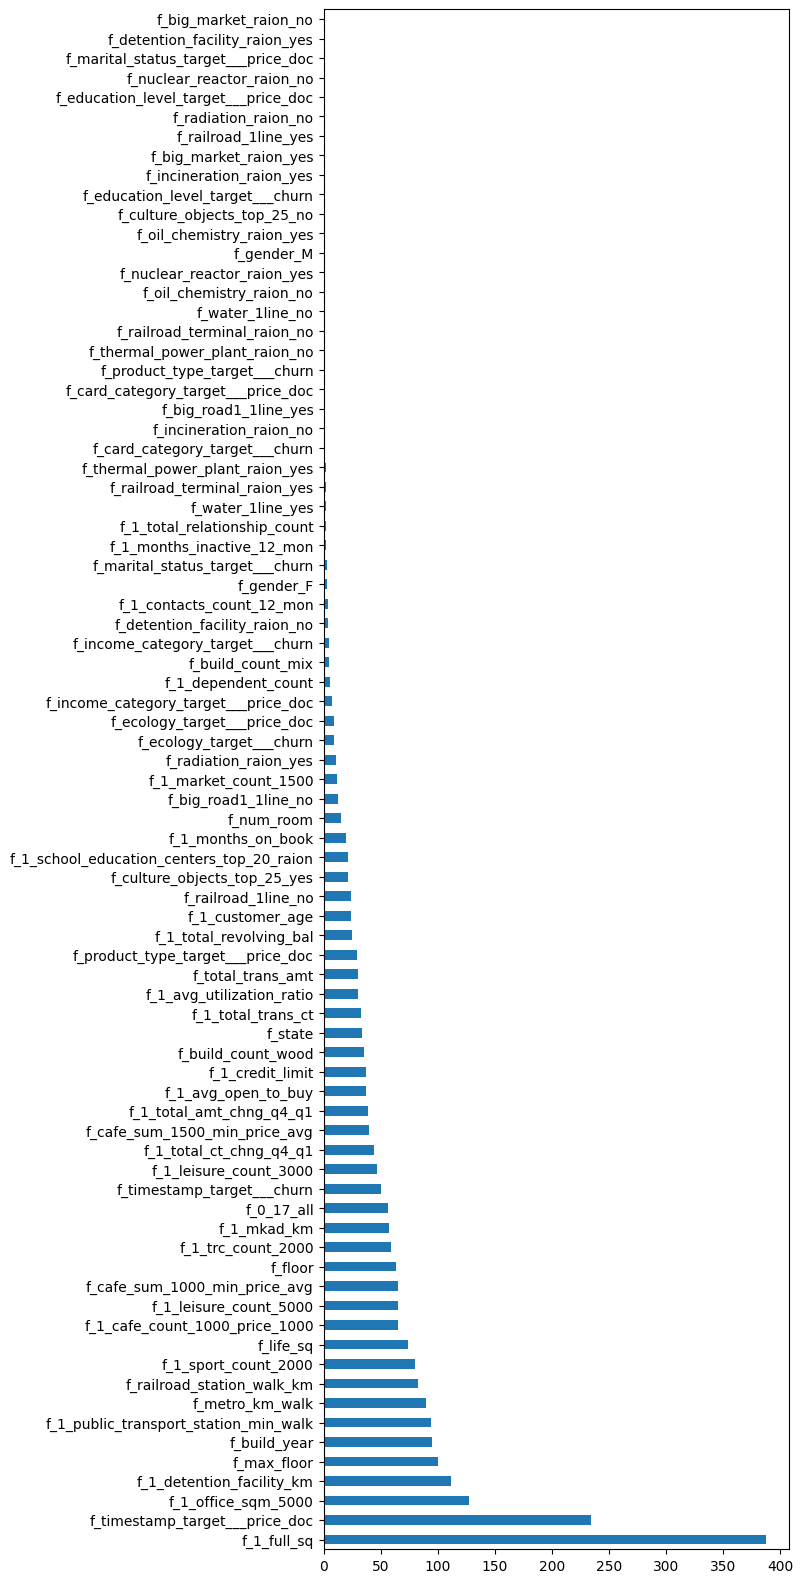

In [200]:
#Get feature importance
LGBM_importances = (pd.Series(LGBM_reg.feature_importances_, index = X_train.columns.tolist()).sort_values(ascending = False).round(4))
LGBM_importances.plot(kind = 'barh', figsize=(6, 20))

XGBoost

In [201]:
from xgboost import XGBRegressor

In [ ]:
#create an empty list to store max_depth the parameter values
max_depth = []

#crearte an empty dictionary to store the scores
MSLE_scores_XGB1 = {'train':[], 'valid': []}

#create a range for the hyperparameters max_depth
for k in range(2,22,2):
  # display each max_depth value:
    print(f'Max Depth: {k}')

    #build the tree
    XGB_reg = XGBRegressor(random_state= 42, max_depth= k, force_row_wise= True)

#add max_depth values to the list
    max_depth.append(k)

    #fit the model
    XGB_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= XGB_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_XGB1['train'].append(score_train)

#do the same for the validation set
    value_for_valid= XGB_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_XGB1['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

Max Depth: 2
Train_MSLE: -0.1360
Valid_MSLE: -0.1430


Max Depth: 4
Train_MSLE: -0.1020
Valid_MSLE: -0.1400


Max Depth: 6
Train_MSLE: -0.0420
Valid_MSLE: -0.1430


Max Depth: 8
Train_MSLE: -0.0060
Valid_MSLE: -0.1470


Max Depth: 10
Train_MSLE: -0.0000
Valid_MSLE: -0.1460


Max Depth: 12
Train_MSLE: -0.0000
Valid_MSLE: -0.1470


Max Depth: 14
Train_MSLE: -0.0000
Valid_MSLE: -0.1460


Max Depth: 16
Train_MSLE: -0.0000
Valid_MSLE: -0.1470


Max Depth: 18
Train_MSLE: -0.0000
Valid_MSLE: -0.1490


Max Depth: 20
Train_MSLE: -0.0000
Valid_MSLE: -0.1480




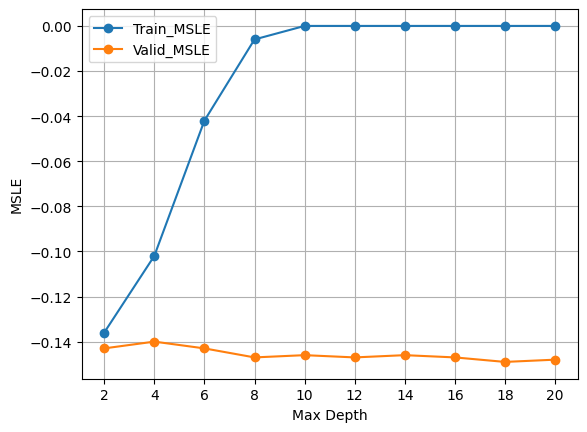

In [ ]:
plt.plot(max_depth, MSLE_scores_XGB1['train'], label = 'Train_MSLE', marker='o' )
plt.plot(max_depth, MSLE_scores_XGB1['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('Max Depth')
plt.ylabel('MSLE')
plt.xticks(max_depth)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#create an empty list to store learning_rate the parameter values
learning_rate = []

#crearte an empty dictionary to store the scores
MSLE_scores_XGB2 = {'train':[], 'valid': []}

#create a range for the hyperparameters learning_rate

for k in [0.01, 0.05, 0.1, 0.5, 1.0, 1.1, 1.4, 1.5, 1.8, 2.0]:
  # display each learning_rate value:
    print(f'learning_rate: {k}')

    #build the tree
    XGB_reg = XGBRegressor(random_state= 42, learning_rate = k, force_row_wise= True)

#add learning_rate values to the list
    learning_rate.append(k)

    #fit the model
    XGB_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= XGB_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_XGB2['train'].append(score_train)

#do the same for the validation set
    value_for_valid= XGB_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_XGB2['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

learning_rate: 0.01
Train_MSLE: -0.1530
Valid_MSLE: -0.1610


learning_rate: 0.05
Train_MSLE: -0.1140
Valid_MSLE: -0.1380


learning_rate: 0.1
Train_MSLE: -0.0950
Valid_MSLE: -0.1360


learning_rate: 0.5
Train_MSLE: -0.0210
Valid_MSLE: -0.1590


learning_rate: 1.0
Train_MSLE: -0.0060
Valid_MSLE: -0.2370


learning_rate: 1.1
Train_MSLE: -0.0050
Valid_MSLE: -0.2580


learning_rate: 1.4
Train_MSLE: -0.0060
Valid_MSLE: -0.3680


learning_rate: 1.5
Train_MSLE: -0.0080
Valid_MSLE: -0.4250


learning_rate: 1.8
Train_MSLE: -0.0190
Valid_MSLE: -0.6370


learning_rate: 2.0
Train_MSLE: -0.1470
Valid_MSLE: -0.4240




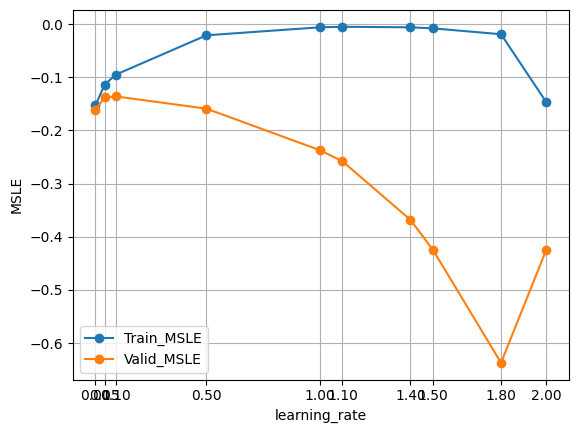

In [ ]:
plt.plot(learning_rate, MSLE_scores_XGB2['train'], label = 'Train_MSLE', marker='o' )
plt.plot(learning_rate, MSLE_scores_XGB2['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('learning_rate')
plt.ylabel('MSLE')
plt.xticks(learning_rate)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#create an empty list to store ln_estimatorsthe parameter values
n_estimators = []

#crearte an empty dictionary to store the scores
MSLE_scores_XGB2 = {'train':[], 'valid': []}

#create a range for the hyperparameters n_estimators

for k in range(2,22,2):
  # display n_estimatorsvalue:
    print(f'n_estimators: {k}')

    #build the tree
    XGB_reg = XGBRegressor(random_state= 42, n_estimators = k, force_row_wise= True)

#add n_estimators values to the list
    n_estimators.append(k)

    #fit the model
    XGB_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= XGB_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_XGB2['train'].append(score_train)

#do the same for the validation set
    value_for_valid= XGB_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_XGB2['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

n_estimators: 2
Train_MSLE: -0.1670
Valid_MSLE: -0.1720


n_estimators: 4
Train_MSLE: -0.1440
Valid_MSLE: -0.1530


n_estimators: 6
Train_MSLE: -0.1330
Valid_MSLE: -0.1460


n_estimators: 8
Train_MSLE: -0.1270
Valid_MSLE: -0.1430


n_estimators: 10
Train_MSLE: -0.1230
Valid_MSLE: -0.1410


n_estimators: 12
Train_MSLE: -0.1210
Valid_MSLE: -0.1400


n_estimators: 14
Train_MSLE: -0.1180
Valid_MSLE: -0.1400


n_estimators: 16
Train_MSLE: -0.1150
Valid_MSLE: -0.1390


n_estimators: 18
Train_MSLE: -0.1120
Valid_MSLE: -0.1390


n_estimators: 20
Train_MSLE: -0.1110
Valid_MSLE: -0.1390




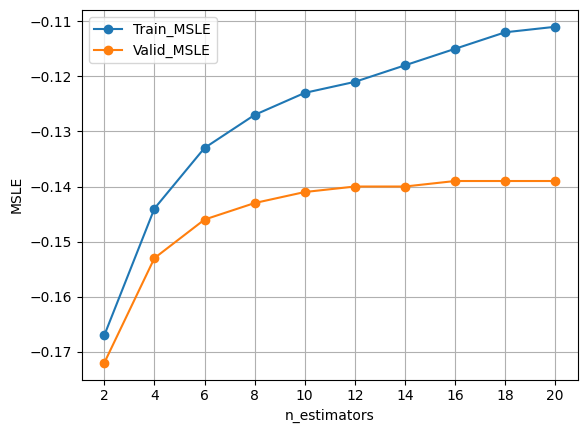

In [ ]:
plt.plot(n_estimators, MSLE_scores_XGB2['train'], label = 'Train_MSLE', marker='o' )
plt.plot(n_estimators, MSLE_scores_XGB2['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('n_estimators')
plt.ylabel('MSLE')
plt.xticks(n_estimators)
plt.grid()
plt.legend()
plt.show()

In [202]:
#Best model for XGB Regressor

#get training data
name, X_, y_ = get_X_y[0]

#build the model
XGB_reg = XGBRegressor( random_state=47, learning_rate = 0.1 ) #, max_depth = 4

#fit the model
XGB_reg.fit(X_, y_['__price_doc'])

#make predictions
for name, X_, y_ in get_X_y:
  value = XGB_reg.predict(X_)
 #convert all negative predictions to zero
  value[value < 0] = 0
    #append the values of the prediction
  y_['__price_pedict_XGB_reg'] = value

for name, X_, y_ in get_X_y:
  score = metric_for_price(y_true = y_['__price_doc'], y_pred = y_['__price_pedict_XGB_reg'])
  print(f'{name:10s}: {score:.4f}')

train     : -0.0950
valid     : -0.1370


<Axes: >

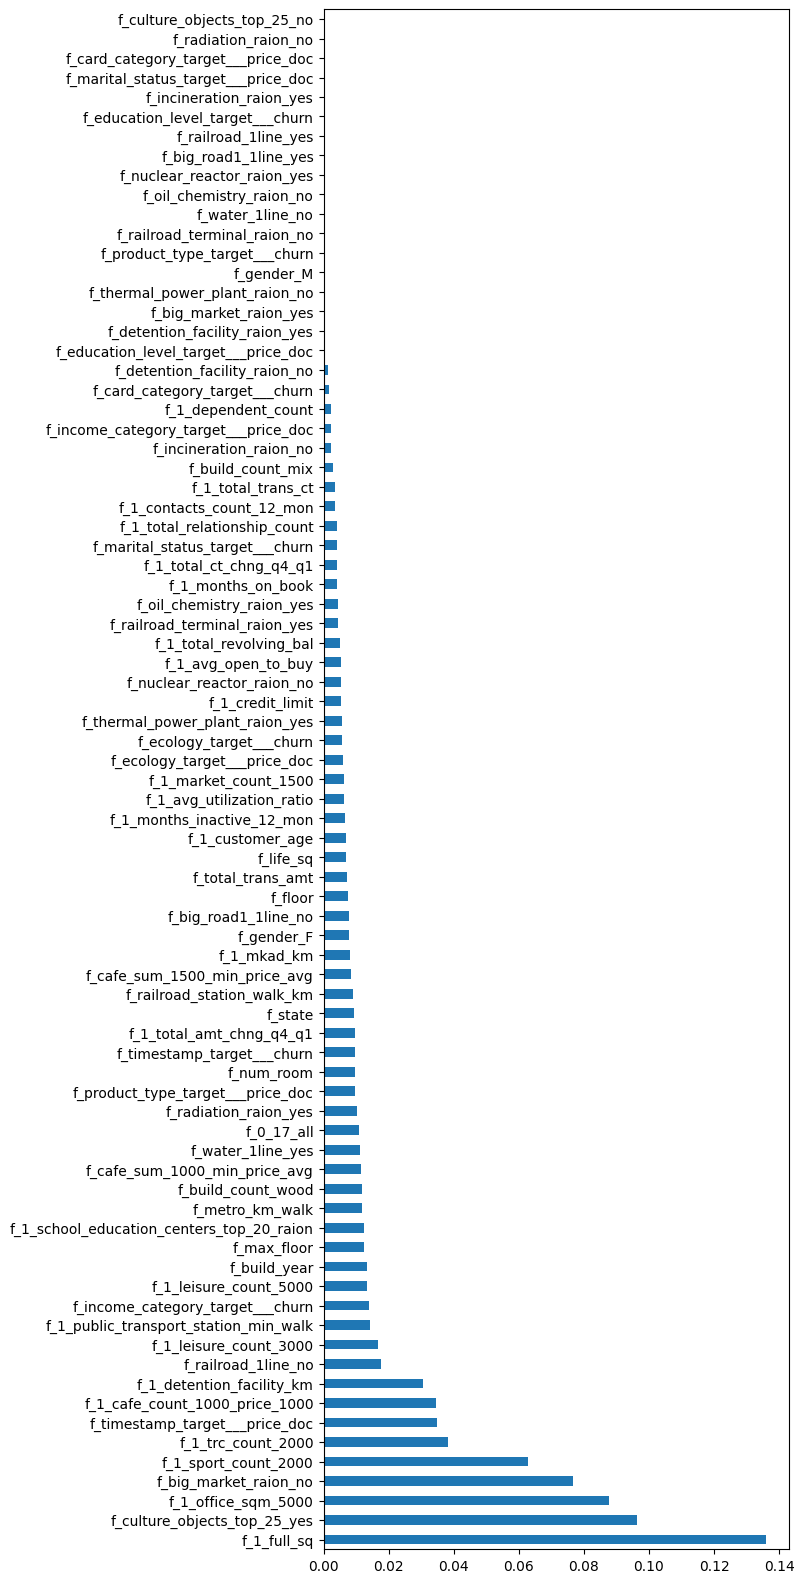

In [203]:
#Get feature importance
XGB_importances = (pd.Series(XGB_reg.feature_importances_, index = X_train.columns.tolist()).sort_values(ascending = False).round(4))
XGB_importances.plot(kind = 'barh', figsize=(6, 20))

CatBoost

In [26]:
!pip uninstall catboost

Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Would remove:
    /usr/local/etc/jupyter/nbconfig/notebook.d/catboost-widget.json
    /usr/local/lib/python3.11/dist-packages/catboost-1.2.7.dist-info/*
    /usr/local/lib/python3.11/dist-packages/catboost/*
    /usr/local/share/jupyter/labextensions/catboost-widget/package.json
    /usr/local/share/jupyter/labextensions/catboost-widget/static/138.1b18795f1631648f3df1.js
    /usr/local/share/jupyter/labextensions/catboost-widget/static/479.d43617224b25ecf15b1d.js
    /usr/local/share/jupyter/labextensions/catboost-widget/static/479.d43617224b25ecf15b1d.js.LICENSE.txt
    /usr/local/share/jupyter/labextensions/catboost-widget/static/486.bafd26b008c3405f7750.js
    /usr/local/share/jupyter/labextensions/catboost-widget/static/486.bafd26b008c3405f7750.js.LICENSE.txt
    /usr/local/share/jupyter/labextensions/catboost-widget/static/755.297bcad6e07632169fc2.js
    /usr/local/share/jupyter/labextensions/catboost-widge

In [1]:
!pip3 install catboost

In [21]:
!pip3 install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 27.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

#create an empty list to store iterations the parameter values
iterations= []

#crearte an empty dictionary to store the scores
MSLE_scores_CB1 = {'train':[], 'valid': []}

#create a range for the hyperparameters iterations
for k in range(2,22,2):
  # display each iterations value:
    print(f'iterations: {k}')

    #build the tree
    CB_reg = CatBoostRegressor(random_state= 42, iterations= k)

#add iterations values to the list
    iterations.append(k)

    #fit the model
    CB_reg.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= CB_reg.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_CB1['train'].append(score_train)

#do the same for the validation set
    value_for_valid= CB_reg.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_CB1['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

iterations: 2
Learning rate set to 0.5
0:	learn: 3.6481525	total: 60.8ms	remaining: 60.8ms
1:	learn: 3.2257904	total: 70.6ms	remaining: 0us
Train_MSLE: -0.1650
Valid_MSLE: -0.1650


iterations: 4
Learning rate set to 0.5
0:	learn: 3.6481525	total: 11.7ms	remaining: 35ms
1:	learn: 3.2257904	total: 32.1ms	remaining: 32.1ms
2:	learn: 3.0414245	total: 41.7ms	remaining: 13.9ms
3:	learn: 2.9386842	total: 50.5ms	remaining: 0us
Train_MSLE: -0.1550
Valid_MSLE: -0.1560


iterations: 6
Learning rate set to 0.5
0:	learn: 3.6481525	total: 16.3ms	remaining: 81.4ms
1:	learn: 3.2257904	total: 40.3ms	remaining: 80.7ms
2:	learn: 3.0414245	total: 49.8ms	remaining: 49.8ms
3:	learn: 2.9386842	total: 59ms	remaining: 29.5ms
4:	learn: 2.8544002	total: 71ms	remaining: 14.2ms
5:	learn: 2.7964893	total: 81.2ms	remaining: 0us
Train_MSLE: -0.1490
Valid_MSLE: -0.1500


iterations: 8
Learning rate set to 0.5
0:	learn: 3.6481525	total: 10.4ms	remaining: 72.9ms
1:	learn: 3.2257904	total: 20.8ms	remaining: 62.3ms
2:	le

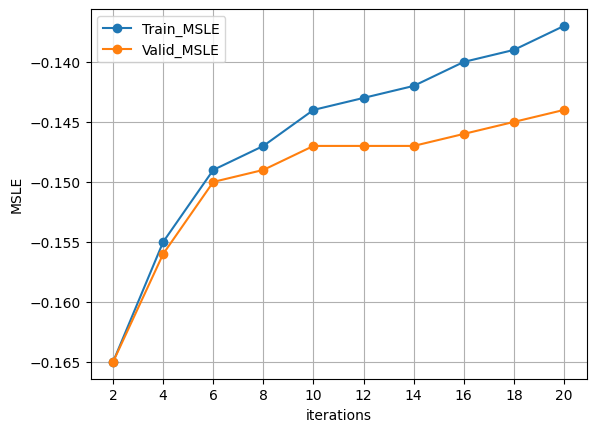

In [ ]:
plt.plot(iterations, MSLE_scores_CB1['train'], label = 'Train_MSLE', marker='o' )
plt.plot(iterations, MSLE_scores_CB1['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('iterations')
plt.ylabel('MSLE')
plt.xticks(iterations)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#create an empty list to store learning_rate
learning_rate= []

#crearte an empty dictionary to store the scores
MSLE_scores_CB2 = {'train':[], 'valid': []}

#create a range for the hyperparameters iterations
for k in [0.01, 0.05, 0.1, 0.5, 1.0, 1.1, 1.4, 1.5, 1.8, 2.0]:
  # display each iterations value:
    print(f'learning_rate: {k}')

    #build the tree
    CB_reg2 = CatBoostRegressor(random_state= 42, learning_rate= k)

#add iterations values to the list
    learning_rate.append(k)

    #fit the model
    CB_reg2.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= CB_reg2.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_CB2['train'].append(score_train)

#do the same for the validation set
    value_for_valid= CB_reg2.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_CB2['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

Streaming output truncated to the last 5000 lines.
40:	learn: 3.8515045	total: 436ms	remaining: 10.2s
41:	learn: 3.8389937	total: 446ms	remaining: 10.2s
42:	learn: 3.8264241	total: 455ms	remaining: 10.1s
43:	learn: 3.8156633	total: 465ms	remaining: 10.1s
44:	learn: 3.8048795	total: 475ms	remaining: 10.1s
45:	learn: 3.7931655	total: 485ms	remaining: 10.1s
46:	learn: 3.7806097	total: 495ms	remaining: 10s
47:	learn: 3.7689625	total: 504ms	remaining: 10s
48:	learn: 3.7583205	total: 514ms	remaining: 9.98s
49:	learn: 3.7478176	total: 527ms	remaining: 10s
50:	learn: 3.7368488	total: 536ms	remaining: 9.98s
51:	learn: 3.7265630	total: 546ms	remaining: 9.96s
52:	learn: 3.7156518	total: 558ms	remaining: 9.97s
53:	learn: 3.7051669	total: 567ms	remaining: 9.94s
54:	learn: 3.6950803	total: 577ms	remaining: 9.92s
55:	learn: 3.6838614	total: 587ms	remaining: 9.9s
56:	learn: 3.6735199	total: 597ms	remaining: 9.87s
57:	learn: 3.6635968	total: 606ms	remaining: 9.85s
58:	learn: 3.6539755	total: 616ms	rema

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


15:	learn: 2.2280329	total: 165ms	remaining: 10.1s
16:	learn: 2.2102626	total: 177ms	remaining: 10.2s
17:	learn: 2.1853580	total: 186ms	remaining: 10.2s
18:	learn: 2.1513612	total: 195ms	remaining: 10.1s
19:	learn: 2.1236994	total: 205ms	remaining: 10.1s
20:	learn: 2.1218132	total: 214ms	remaining: 9.98s
21:	learn: 2.0951200	total: 224ms	remaining: 9.95s
22:	learn: 2.0741423	total: 234ms	remaining: 9.93s
23:	learn: 2.0520102	total: 243ms	remaining: 9.89s
24:	learn: 2.0364892	total: 253ms	remaining: 9.85s
25:	learn: 2.0209279	total: 262ms	remaining: 9.81s
26:	learn: 2.0035570	total: 271ms	remaining: 9.78s
27:	learn: 1.9851632	total: 283ms	remaining: 9.82s
28:	learn: 1.9720593	total: 293ms	remaining: 9.82s
29:	learn: 1.9560553	total: 303ms	remaining: 9.8s
30:	learn: 1.9369402	total: 313ms	remaining: 9.77s
31:	learn: 1.9218779	total: 322ms	remaining: 9.74s
32:	learn: 1.9077176	total: 332ms	remaining: 9.72s
33:	learn: 1.8930342	total: 341ms	remaining: 9.7s
34:	learn: 1.8765105	total: 352ms

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


14:	learn: 2.2971003	total: 148ms	remaining: 9.75s
15:	learn: 2.2711108	total: 166ms	remaining: 10.2s
16:	learn: 2.2364167	total: 176ms	remaining: 10.2s
17:	learn: 2.2183393	total: 185ms	remaining: 10.1s
18:	learn: 2.2032151	total: 195ms	remaining: 10.1s
19:	learn: 2.1835451	total: 204ms	remaining: 9.99s
20:	learn: 2.1643270	total: 214ms	remaining: 9.96s
21:	learn: 2.1456563	total: 224ms	remaining: 9.97s
22:	learn: 2.1249273	total: 234ms	remaining: 9.93s
23:	learn: 2.1116051	total: 243ms	remaining: 9.9s
24:	learn: 2.0919137	total: 253ms	remaining: 9.86s
25:	learn: 2.0736089	total: 262ms	remaining: 9.82s
26:	learn: 2.0670231	total: 271ms	remaining: 9.78s
27:	learn: 2.0524194	total: 281ms	remaining: 9.75s
28:	learn: 2.0344907	total: 291ms	remaining: 9.73s
29:	learn: 2.0204439	total: 300ms	remaining: 9.71s
30:	learn: 2.0064701	total: 312ms	remaining: 9.76s
31:	learn: 1.9931643	total: 322ms	remaining: 9.74s
32:	learn: 1.9777149	total: 331ms	remaining: 9.71s
33:	learn: 1.9595422	total: 341m

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 3.5942671	total: 24.9ms	remaining: 24.9s
1:	learn: 3.2943144	total: 43.8ms	remaining: 21.9s
2:	learn: 3.0569718	total: 57.1ms	remaining: 19s
3:	learn: 2.9618979	total: 78.5ms	remaining: 19.5s
4:	learn: 2.7952455	total: 95ms	remaining: 18.9s
5:	learn: 2.7151732	total: 110ms	remaining: 18.2s
6:	learn: 2.6447693	total: 130ms	remaining: 18.4s
7:	learn: 2.5531796	total: 151ms	remaining: 18.7s
8:	learn: 2.4802159	total: 167ms	remaining: 18.4s
9:	learn: 2.4425153	total: 192ms	remaining: 19s
10:	learn: 2.3995755	total: 215ms	remaining: 19.4s
11:	learn: 2.3671650	total: 242ms	remaining: 19.9s
12:	learn: 2.3613962	total: 261ms	remaining: 19.8s
13:	learn: 2.3302550	total: 289ms	remaining: 20.3s
14:	learn: 2.2944015	total: 313ms	remaining: 20.6s
15:	learn: 2.2706325	total: 339ms	remaining: 20.9s
16:	learn: 2.2535519	total: 363ms	remaining: 21s
17:	learn: 2.2277591	total: 391ms	remaining: 21.4s
18:	learn: 2.1992132	total: 411ms	remaining: 21.2s
19:	learn: 2.1673730	total: 427ms	remaining:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


5:	learn: 3.1405292	total: 145ms	remaining: 24.1s
6:	learn: 3.0707536	total: 169ms	remaining: 24s
7:	learn: 3.0070511	total: 194ms	remaining: 24.1s
8:	learn: 2.8515771	total: 220ms	remaining: 24.2s
9:	learn: 2.8159465	total: 244ms	remaining: 24.2s
10:	learn: 2.7381723	total: 265ms	remaining: 23.8s
11:	learn: 2.7082942	total: 293ms	remaining: 24.1s
12:	learn: 2.6480918	total: 316ms	remaining: 24s
13:	learn: 2.6225722	total: 340ms	remaining: 24s
14:	learn: 2.5558167	total: 376ms	remaining: 24.7s
15:	learn: 2.5046891	total: 391ms	remaining: 24.1s
16:	learn: 2.4898991	total: 405ms	remaining: 23.4s
17:	learn: 2.4771286	total: 418ms	remaining: 22.8s
18:	learn: 2.4478882	total: 434ms	remaining: 22.4s
19:	learn: 2.4244607	total: 461ms	remaining: 22.6s
20:	learn: 2.4084072	total: 507ms	remaining: 23.6s
21:	learn: 2.3853532	total: 527ms	remaining: 23.4s
22:	learn: 2.3719567	total: 547ms	remaining: 23.2s
23:	learn: 2.3492981	total: 572ms	remaining: 23.3s
24:	learn: 2.3275288	total: 606ms	remainin

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 4.4134240	total: 13.8ms	remaining: 13.8s
1:	learn: 4.3152868	total: 28.9ms	remaining: 14.4s
2:	learn: 4.2070819	total: 44.9ms	remaining: 14.9s
3:	learn: 4.0868619	total: 54.6ms	remaining: 13.6s
4:	learn: 3.9932917	total: 64.2ms	remaining: 12.8s
5:	learn: 3.9494091	total: 73.9ms	remaining: 12.2s
6:	learn: 3.9036810	total: 84.6ms	remaining: 12s
7:	learn: 3.8616899	total: 97.9ms	remaining: 12.1s
8:	learn: 3.8272666	total: 108ms	remaining: 11.9s
9:	learn: 3.7890233	total: 118ms	remaining: 11.7s
10:	learn: 3.7507623	total: 128ms	remaining: 11.5s
11:	learn: 3.7170106	total: 139ms	remaining: 11.5s
12:	learn: 3.6575290	total: 156ms	remaining: 11.8s
13:	learn: 3.6061230	total: 166ms	remaining: 11.7s
14:	learn: 3.5826118	total: 176ms	remaining: 11.6s
15:	learn: 3.5592512	total: 186ms	remaining: 11.4s
16:	learn: 3.5390094	total: 197ms	remaining: 11.4s
17:	learn: 3.4854494	total: 207ms	remaining: 11.3s
18:	learn: 3.4632857	total: 222ms	remaining: 11.5s
19:	learn: 3.4426349	total: 233ms	r

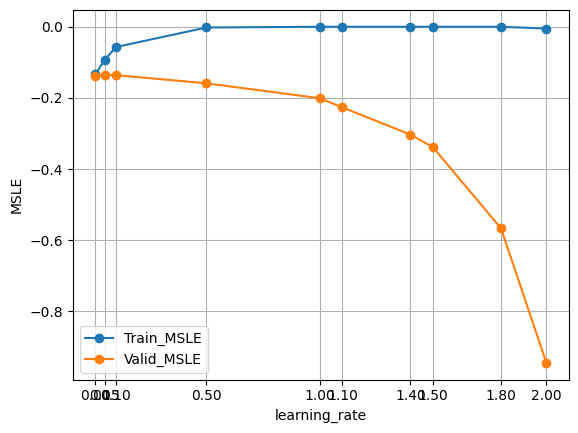

In [ ]:
plt.plot(learning_rate, MSLE_scores_CB2['train'], label = 'Train_MSLE', marker='o' )
plt.plot(learning_rate, MSLE_scores_CB2['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('learning_rate')
plt.ylabel('MSLE')
plt.xticks(learning_rate)
plt.grid()
plt.legend()
plt.show()

In [186]:

#create an empty list to store max_depth
max_depth= []

#crearte an empty dictionary to store the scores
MSLE_scores_CB3 = {'train':[], 'valid': []}

#create a range for the hyperparameters iterations
for k in range(2,22,2):
  # display each iterations value:
    print(f'max_depth: {k}')

    #build the tree
    CB_reg3 = CatBoostRegressor(random_state= 42, learning_rate= k, iterations = 10)

#add iterations values to the list
    max_depth.append(k)

    #fit the model
    CB_reg3.fit(X_train, y_train['__price_doc'])

#get predictions for the train dataset
    value_for_train= CB_reg3.predict(X_train)
    #convert all negative predictions to zero
    value_for_train[value_for_train< 0] = 0
    #get the MSLE scores
    score_train = metric_for_price(y_true = y_train['__price_doc'], y_pred = value_for_train)
    #add score metrics for train and validation sets
    MSLE_scores_CB3['train'].append(score_train)

#do the same for the validation set
    value_for_valid= CB_reg3.predict(X_valid)
    value_for_valid[value_for_valid< 0] = 0
    score_valid = metric_for_price(y_true = y_valid['__price_doc'], y_pred = value_for_valid)
    MSLE_scores_CB3['valid'].append(score_valid)

    print(f'Train_MSLE: {score_train:.4f}')
    print(f'Valid_MSLE: {score_valid:.4f}')
    print('\n')

max_depth: 2
0:	learn: 4.4134240	total: 41.5ms	remaining: 373ms


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 4.3152868	total: 79.7ms	remaining: 319ms
2:	learn: 4.2070819	total: 122ms	remaining: 286ms
3:	learn: 4.0868619	total: 157ms	remaining: 236ms
4:	learn: 3.9932917	total: 185ms	remaining: 185ms
5:	learn: 3.9494091	total: 207ms	remaining: 138ms
6:	learn: 3.9036810	total: 259ms	remaining: 111ms
7:	learn: 3.8616899	total: 291ms	remaining: 72.7ms
8:	learn: 3.8272666	total: 331ms	remaining: 36.8ms
9:	learn: 3.7890233	total: 370ms	remaining: 0us
Train_MSLE: -0.2380
Valid_MSLE: -0.2540


max_depth: 4


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 9.5261622	total: 26.3ms	remaining: 236ms
1:	learn: 25.2869455	total: 49.3ms	remaining: 197ms
2:	learn: 72.3970668	total: 77ms	remaining: 180ms
3:	learn: 210.7800015	total: 101ms	remaining: 152ms
4:	learn: 615.7015069	total: 126ms	remaining: 126ms
5:	learn: 1801.0251312	total: 151ms	remaining: 101ms
6:	learn: 5273.9737234	total: 175ms	remaining: 75ms
7:	learn: 15458.8004450	total: 197ms	remaining: 49.1ms
8:	learn: 45352.6102053	total: 225ms	remaining: 25ms
9:	learn: 133166.1054201	total: 252ms	remaining: 0us
Train_MSLE: -61.3890
Valid_MSLE: -61.3830


max_depth: 6
0:	learn: 15.2992548	total: 23ms	remaining: 207ms


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 70.1117180	total: 47.5ms	remaining: 190ms
2:	learn: 337.9456051	total: 61.6ms	remaining: 144ms
3:	learn: 1638.6433465	total: 74.3ms	remaining: 111ms
4:	learn: 7959.8551187	total: 86.8ms	remaining: 86.8ms
5:	learn: 38719.3301523	total: 113ms	remaining: 75.1ms
6:	learn: 188571.0951653	total: 141ms	remaining: 60.6ms
7:	learn: 919370.8719323	total: 166ms	remaining: 41.5ms
8:	learn: 4486740.7705559	total: 195ms	remaining: 21.7ms
9:	learn: 21916004.1566079	total: 221ms	remaining: 0us
Train_MSLE: -140.9840
Valid_MSLE: -141.3340


max_depth: 8
0:	learn: 21.1999199	total: 28.8ms	remaining: 259ms
1:	learn: 140.8072949	total: 53ms	remaining: 212ms
2:	learn: 966.9562314	total: 78.4ms	remaining: 183ms


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 6655.2025851	total: 123ms	remaining: 184ms
4:	learn: 45769.3981680	total: 148ms	remaining: 148ms
5:	learn: 315596.4966613	total: 173ms	remaining: 116ms
6:	learn: 2177544.9718267	total: 196ms	remaining: 84ms
7:	learn: 15031411.6936376	total: 210ms	remaining: 52.5ms
8:	learn: 103797121.2607182	total: 224ms	remaining: 24.9ms
9:	learn: 716956554.8994917	total: 246ms	remaining: 0us
Train_MSLE: -218.6430
Valid_MSLE: -218.5150


max_depth: 10
0:	learn: 27.1450914	total: 27.1ms	remaining: 244ms
1:	learn: 235.1433157	total: 51.5ms	remaining: 206ms
2:	learn: 2078.8144364	total: 75.1ms	remaining: 175ms
3:	learn: 18408.5420192	total: 98.8ms	remaining: 148ms


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


4:	learn: 163181.1169507	total: 128ms	remaining: 128ms
5:	learn: 1447592.0530843	total: 152ms	remaining: 102ms
6:	learn: 12848850.7200654	total: 180ms	remaining: 77.3ms
7:	learn: 114094672.1822895	total: 211ms	remaining: 52.8ms
8:	learn: 1013463767.5096381	total: 232ms	remaining: 25.8ms
9:	learn: 9004590388.5283775	total: 273ms	remaining: 0us
Train_MSLE: -288.8920
Valid_MSLE: -288.7300


max_depth: 12
0:	learn: 33.1108040	total: 28.2ms	remaining: 254ms
1:	learn: 354.3586323	total: 52.8ms	remaining: 211ms
2:	learn: 3813.5584018	total: 77.3ms	remaining: 180ms


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 41066.9622122	total: 105ms	remaining: 158ms
4:	learn: 442481.9021245	total: 129ms	remaining: 129ms
5:	learn: 4770103.6204986	total: 156ms	remaining: 104ms
6:	learn: 51449425.6930316	total: 184ms	remaining: 78.8ms
7:	learn: 555195787.2478445	total: 208ms	remaining: 52.1ms
8:	learn: 5994020019.7736292	total: 233ms	remaining: 25.9ms
9:	learn: 64742698282.8589935	total: 259ms	remaining: 0us
Train_MSLE: -342.5080
Valid_MSLE: -343.0910


max_depth: 14
0:	learn: 39.0876538	total: 13.1ms	remaining: 118ms
1:	learn: 495.2068746	total: 26ms	remaining: 104ms
2:	learn: 6300.1180285	total: 38.1ms	remaining: 88.8ms
3:	learn: 80199.3147641	total: 52.8ms	remaining: 79.2ms
4:	learn: 1021474.8055725	total: 66.4ms	remaining: 66.4ms
5:	learn: 13016933.1549336	total: 78.8ms	remaining: 52.5ms
6:	learn: 165960596.1400923	total: 92.6ms	remaining: 39.7ms


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 2116943607.7272348	total: 117ms	remaining: 29.3ms
8:	learn: 27015639074.6137619	total: 130ms	remaining: 14.4ms
9:	learn: 344919067303.9968262	total: 146ms	remaining: 0us
Train_MSLE: -395.4750
Valid_MSLE: -396.1710


max_depth: 16
0:	learn: 45.0712102	total: 25.3ms	remaining: 228ms


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 659.5728352	total: 50.3ms	remaining: 201ms
2:	learn: 9684.1433105	total: 65.4ms	remaining: 153ms
3:	learn: 142269.3064902	total: 87.8ms	remaining: 132ms
4:	learn: 2091183.4424076	total: 106ms	remaining: 106ms
5:	learn: 30753402.5739702	total: 121ms	remaining: 80.4ms
6:	learn: 452486670.3752760	total: 157ms	remaining: 67.4ms
7:	learn: 6660745210.4896898	total: 170ms	remaining: 42.6ms
8:	learn: 98093009139.4431610	total: 183ms	remaining: 20.3ms
9:	learn: 1445259940264.5212402	total: 197ms	remaining: 0us
Train_MSLE: -443.8920
Valid_MSLE: -444.6930


max_depth: 18


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 51.0591155	total: 26.4ms	remaining: 237ms
1:	learn: 847.4557975	total: 49.9ms	remaining: 200ms
2:	learn: 14103.9204471	total: 79.6ms	remaining: 186ms
3:	learn: 234859.8944151	total: 105ms	remaining: 158ms
4:	learn: 3912962.3465356	total: 128ms	remaining: 128ms
5:	learn: 65225835.0905733	total: 158ms	remaining: 105ms
6:	learn: 1087783272.3628926	total: 185ms	remaining: 79.4ms
7:	learn: 18149589275.3837814	total: 214ms	remaining: 53.5ms
8:	learn: 302961060236.0130615	total: 245ms	remaining: 27.3ms
9:	learn: 5059376088717.2636719	total: 267ms	remaining: 0us
Train_MSLE: -488.5450
Valid_MSLE: -489.4420


max_depth: 20
0:	learn: 57.0500003	total: 24.9ms	remaining: 225ms


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1058.8554014	total: 56.3ms	remaining: 225ms
2:	learn: 19697.7357142	total: 84.8ms	remaining: 198ms
3:	learn: 366638.8402723	total: 107ms	remaining: 160ms
4:	learn: 6827881.7453280	total: 139ms	remaining: 139ms
5:	learn: 127217941.6360389	total: 163ms	remaining: 109ms
6:	learn: 2371467993.4316840	total: 189ms	remaining: 81ms
7:	learn: 44226822072.1626740	total: 214ms	remaining: 53.5ms
8:	learn: 825178166168.7058105	total: 241ms	remaining: 26.8ms
9:	learn: 15402736147937.3730469	total: 261ms	remaining: 0us
Train_MSLE: -530.0280
Valid_MSLE: -531.0170




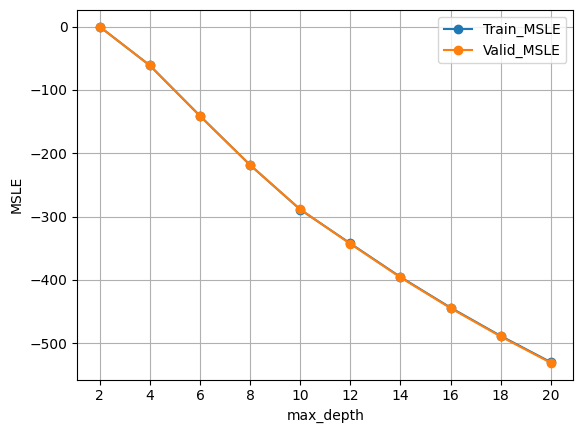

In [187]:
plt.plot(max_depth, MSLE_scores_CB3['train'], label = 'Train_MSLE', marker='o' )
plt.plot(max_depth, MSLE_scores_CB3['valid'], label = 'Valid_MSLE', marker='o' )
plt.xlabel('max_depth')
plt.ylabel('MSLE')
plt.xticks(max_depth)
plt.grid()
plt.legend()
plt.show()

In [189]:
#Best CatBoost Regressor

#get training data
name, X_, y_ = get_X_y[0]

#build the model
CB_reg = CatBoostRegressor(random_state=47, max_depth = 7, learning_rate = 0.05 )

#fit the model
CB_reg.fit(X_, y_['__price_doc'])

#make predictions
for name, X_, y_ in get_X_y:
  value = CB_reg.predict(X_)
 #convert all negative predictions to zero
  value[value < 0] = 0
    #append the values of the prediction
  y_['__price_pedict_CB_reg'] = value

for name, X_, y_ in get_X_y:
  score = metric_for_price(y_true = y_['__price_doc'], y_pred = y_['__price_pedict_CB_reg'])
  print(f'{name:10s}: {score:.4f}')

0:	learn: 4.3932526	total: 39.6ms	remaining: 39.5s
1:	learn: 4.3004086	total: 78.5ms	remaining: 39.2s
2:	learn: 4.2136756	total: 122ms	remaining: 40.4s
3:	learn: 4.1290002	total: 164ms	remaining: 40.8s
4:	learn: 4.0536251	total: 198ms	remaining: 39.5s
5:	learn: 3.9891870	total: 237ms	remaining: 39.3s
6:	learn: 3.9184913	total: 274ms	remaining: 38.8s
7:	learn: 3.8504252	total: 306ms	remaining: 38s
8:	learn: 3.7841564	total: 351ms	remaining: 38.6s
9:	learn: 3.7261065	total: 407ms	remaining: 40.3s
10:	learn: 3.6771439	total: 464ms	remaining: 41.7s
11:	learn: 3.6242767	total: 525ms	remaining: 43.3s
12:	learn: 3.5750460	total: 573ms	remaining: 43.5s
13:	learn: 3.5313855	total: 637ms	remaining: 44.8s
14:	learn: 3.4857781	total: 692ms	remaining: 45.5s
15:	learn: 3.4449796	total: 756ms	remaining: 46.5s
16:	learn: 3.4065162	total: 831ms	remaining: 48s
17:	learn: 3.3694075	total: 879ms	remaining: 48s
18:	learn: 3.3338948	total: 930ms	remaining: 48s
19:	learn: 3.3032784	total: 980ms	remaining: 48

<Axes: >

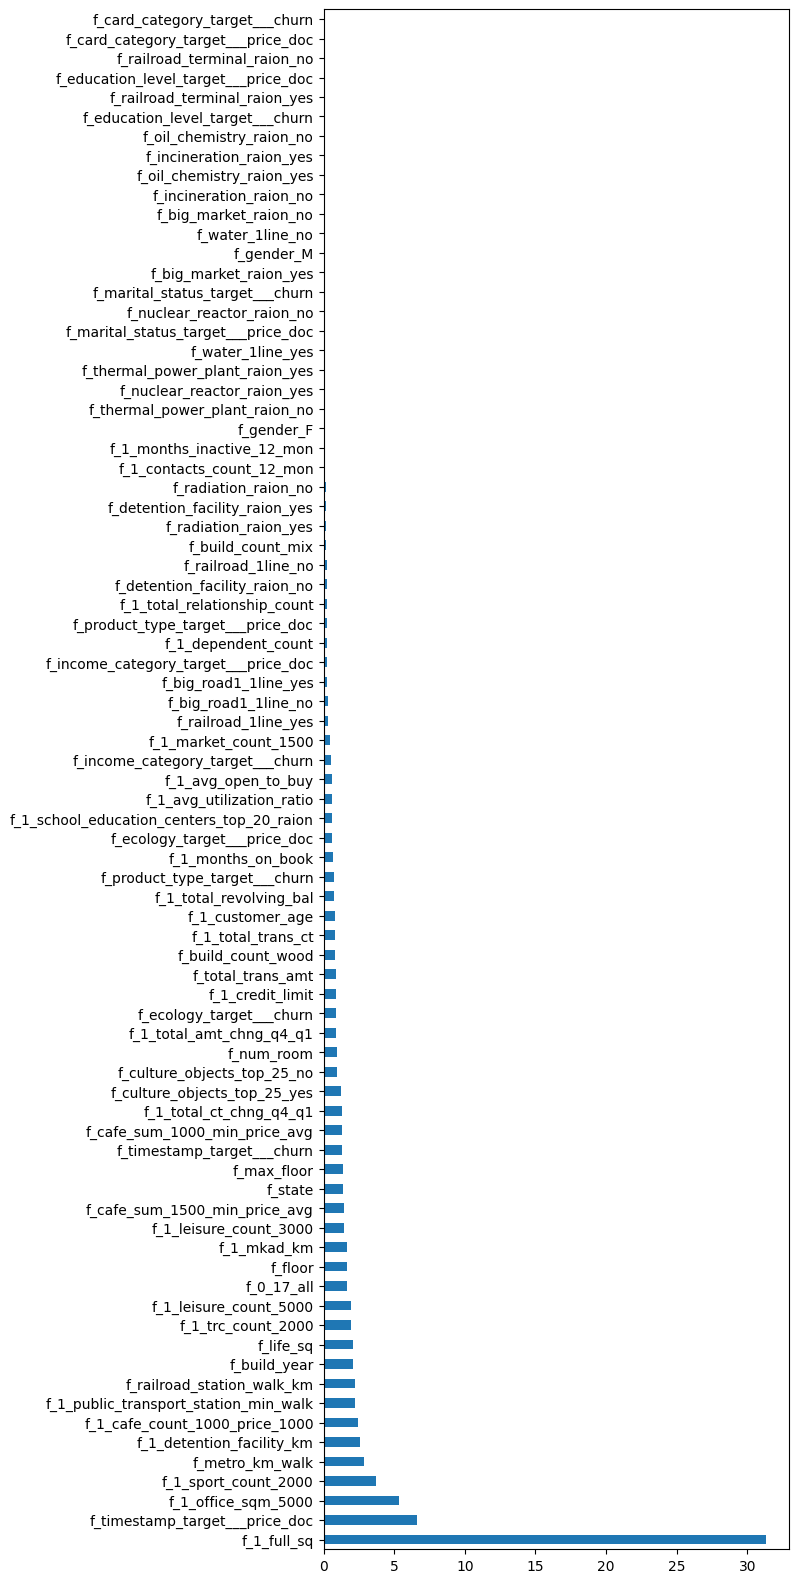

In [190]:
#Get feature importance
CB_importances = (pd.Series(CB_reg.feature_importances_, index = X_train.columns.tolist()).sort_values(ascending = False).round(4))
CB_importances.plot(kind = 'barh', figsize=(6, 20))

# CLASSIFICATION

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#create an empty list to store max_depth values
max_depth = []

#create an empty dict to store scores
scores_DT = { 'train': [], 'valid': []}

#create an iteration for max_depth

for k in range(2,22,2):
  print(f'Max_depth: {k}')

  #append the values for max_depth
  max_depth.append(k)

  #build the treee
  DT_class = DecisionTreeClassifier(random_state= 42, max_depth= k)

  #fit the model and get the scores for the training set
  DT_class.fit(X_train, y_train['__churn'])
  value_for_train= DT_class.predict(X_train)
  value_for_train[value_for_train< 0] = 0
  score_t = metric_for_churn(y_true= y_train['__churn'], y_score = value_for_train)
  scores_DT['train'].append(score_t)

  #get predictions and scores for the validation set
  value_for_valid = DT_class.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_v = metric_for_churn(y_true=y_valid['__churn'], y_score =value_for_valid)
  scores_DT['valid'].append(score_v)

  print(f'Train_roc_auc: {score_t}')
  print(f'Valid_roc_auc: {score_v}')
  print('\n')


Max_depth: 2
Train_roc_auc: 0.755
Valid_roc_auc: 0.733


Max_depth: 4
Train_roc_auc: 0.835
Valid_roc_auc: 0.81


Max_depth: 6
Train_roc_auc: 0.868
Valid_roc_auc: 0.823


Max_depth: 8
Train_roc_auc: 0.906
Valid_roc_auc: 0.828


Max_depth: 10
Train_roc_auc: 0.938
Valid_roc_auc: 0.809


Max_depth: 12
Train_roc_auc: 0.977
Valid_roc_auc: 0.806


Max_depth: 14
Train_roc_auc: 0.994
Valid_roc_auc: 0.806


Max_depth: 16
Train_roc_auc: 0.999
Valid_roc_auc: 0.799


Max_depth: 18
Train_roc_auc: 1.0
Valid_roc_auc: 0.796


Max_depth: 20
Train_roc_auc: 1.0
Valid_roc_auc: 0.799




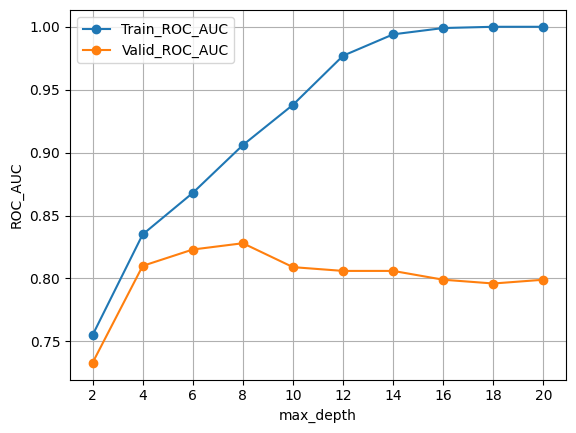

In [ ]:
plt.plot(max_depth, scores_DT['train'], label = 'Train_ROC_AUC', marker='o' )
plt.plot(max_depth, scores_DT['valid'], label = 'Valid_ROC_AUC', marker='o' )
plt.xlabel('max_depth')
plt.ylabel('ROC_AUC')
plt.xticks(max_depth)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#check different min_samples_split numbers

#create an empty list for min_samples_split
min_samples_split = []

#create an empty dictionary to store the scores
scores_DT2 = {'train': [], 'valid': []}

#iterate over min_samples_split
for k in range(2,22,2):
  print(f'min_samples_split: {k}')

  #append the values of min_samples_split in to the list
  min_samples_split.append(k)

  #build the tree
  DT_class2 = DecisionTreeClassifier( min_samples_split = k)

  #Fit, predict and score the model for the train set
  DT_class2.fit(X_train, y_train['__churn'])
  value_for_train = DT_class2.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_t2 = metric_for_churn( y_true= y_train['__churn'], y_score=value_for_train )
  scores_DT2['train'].append(score_t2)

  #predict and score the model for the validation set
  value_for_valid = DT_class2.predict(X_valid)
  value_for_valid [value_for_valid  <0 ] = 0
  score_v2 = metric_for_churn(y_true= y_valid['__churn'], y_score =value_for_valid  )
  scores_DT2['valid'].append(score_v2)

  print(f'Train: {score_t2 }')
  print(f'Valid: {score_v2 }')
  print('\n')


min_samples_split: 2
Train: 1.0
Valid: 0.8


min_samples_split: 4
Train: 0.987
Valid: 0.799


min_samples_split: 6
Train: 0.977
Valid: 0.798


min_samples_split: 8
Train: 0.964
Valid: 0.792


min_samples_split: 10
Train: 0.956
Valid: 0.795


min_samples_split: 12
Train: 0.948
Valid: 0.794


min_samples_split: 14
Train: 0.945
Valid: 0.795


min_samples_split: 16
Train: 0.936
Valid: 0.799


min_samples_split: 18
Train: 0.934
Valid: 0.802


min_samples_split: 20
Train: 0.93
Valid: 0.801




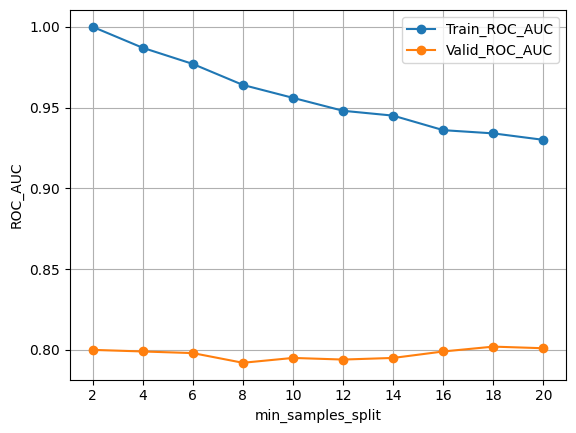

In [ ]:
plt.plot(min_samples_split, scores_DT2['train'], label = 'Train_ROC_AUC',  marker = 'o')
plt.plot(min_samples_split, scores_DT2['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel("min_samples_split")
plt.ylabel("ROC_AUC")
plt.xticks(min_samples_split)
plt.grid()
plt.legend()
plt.show()

In [ ]:

#create an empty list for the min_samples_leaf

min_samples_leaf = []
scores_DT3 = { 'train': [], 'valid': []}

#create iteration
for k in range(2,22,2):
  print(f'min_samples_leaf: {k}')

  min_samples_leaf.append(k)

  #build the tree
  DT_class3 = DecisionTreeClassifier(min_samples_leaf =k)

  #fit the train set
  DT_class3.fit(X_train, y_train['__churn'])
  value_for_train = DT_class3.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_t3 = metric_for_churn( y_true= y_train['__churn'], y_score = value_for_train)
  scores_DT3['train'].append(score_t3)

  #predict the validation set
  value_for_valid = DT_class3.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_v3 = metric_for_churn( y_true = y_valid['__churn'], y_score= value_for_valid)
  scores_DT3['valid'].append(score_v3)

  print(f'Train_AUC: {score_t3}')
  print(f'Valid_AUC: {score_v3}')
  print('\n')


min_samples_leaf: 2
Train_AUC: 0.962
Valid_AUC: 0.788


min_samples_leaf: 4
Train_AUC: 0.935
Valid_AUC: 0.787


min_samples_leaf: 6
Train_AUC: 0.922
Valid_AUC: 0.792


min_samples_leaf: 8
Train_AUC: 0.911
Valid_AUC: 0.808


min_samples_leaf: 10
Train_AUC: 0.902
Valid_AUC: 0.814


min_samples_leaf: 12
Train_AUC: 0.898
Valid_AUC: 0.815


min_samples_leaf: 14
Train_AUC: 0.896
Valid_AUC: 0.817


min_samples_leaf: 16
Train_AUC: 0.888
Valid_AUC: 0.814


min_samples_leaf: 18
Train_AUC: 0.875
Valid_AUC: 0.807


min_samples_leaf: 20
Train_AUC: 0.872
Valid_AUC: 0.805




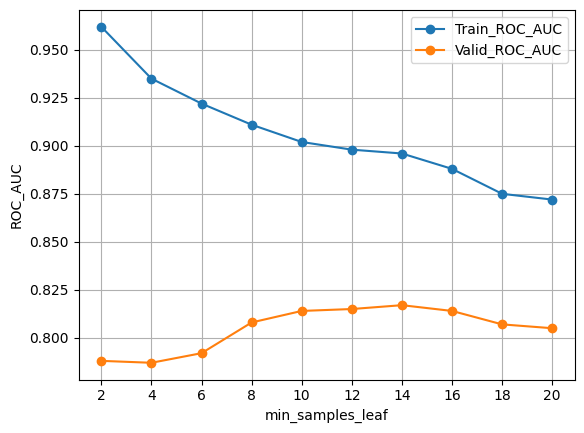

In [ ]:
plt.plot(min_samples_leaf, scores_DT3['train'], label ='Train_ROC_AUC', marker = 'o')
plt.plot(min_samples_leaf, scores_DT3['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('min_samples_leaf')
plt.ylabel('ROC_AUC')
plt.xticks(min_samples_leaf)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#Best model for Decison Tree classifier

#select the training data
name, X_, y_ = get_X_y[0]

#create a range for the hyperparameters max_depth and other

#build the forest
DT_class_best = DecisionTreeClassifier(random_state= 47, max_depth=8, min_samples_split=20, min_samples_leaf=14 )

#fit the model
DT_class_best.fit(X_, y_['__churn'])

#make predictions
for name, X_, y_ in get_X_y:
  value = DT_class_best.predict(X_)
 #convert all negative predictions to zero
  value[value < 0] = 0
    #append the values of the prediction
  y_['__price_pedict_class_best'] = value

for name, X_, y_ in get_X_y:
  score = metric_for_churn(y_true = y_['__churn'], y_score = y_['__price_pedict_class_best'])
  print(f'{name:10s}: {score:.4f}')

train     : 0.8810
valid     : 0.8230


<Axes: >

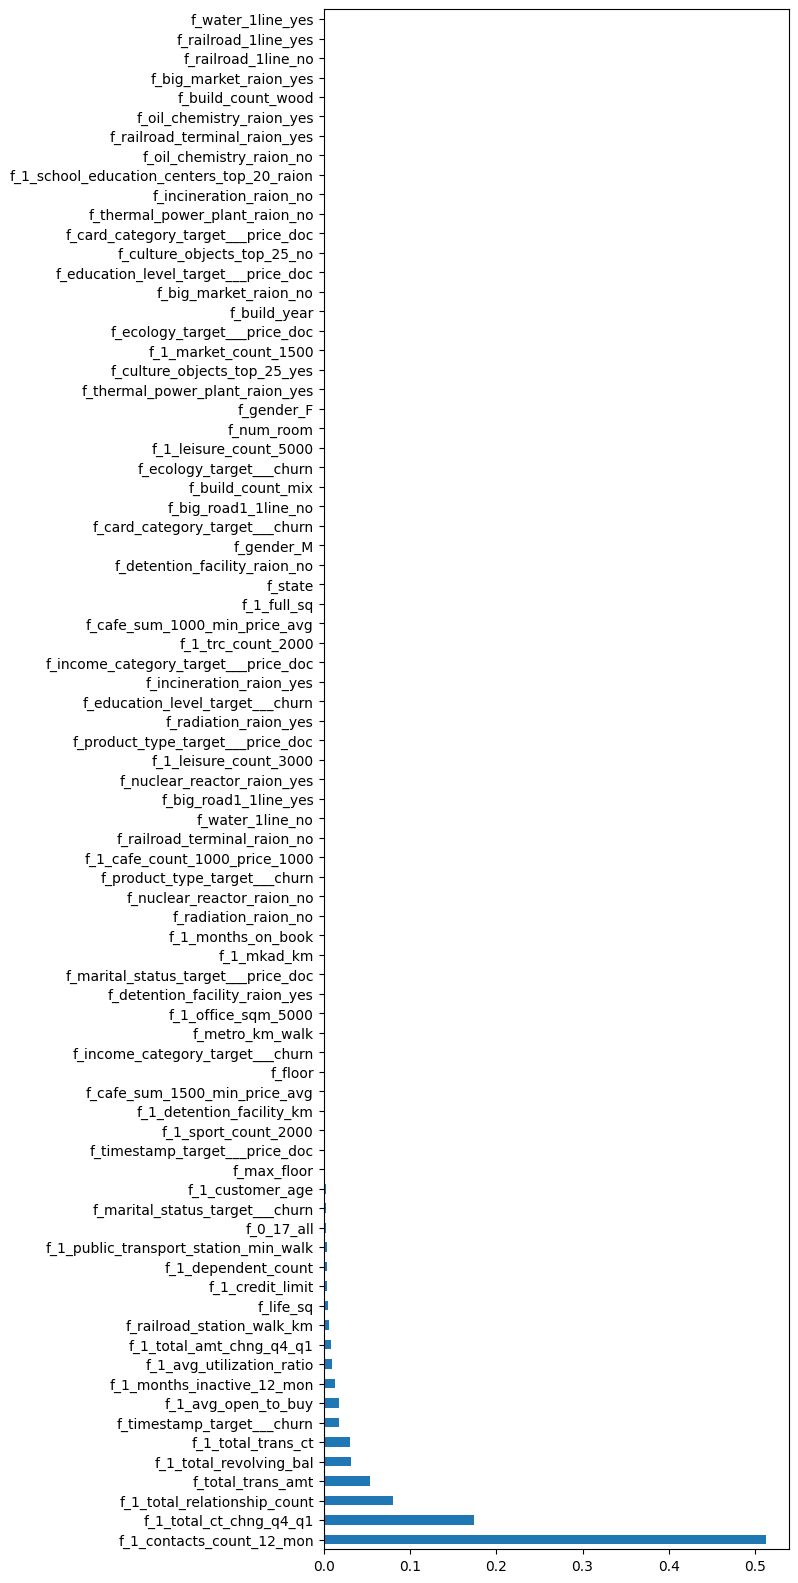

In [205]:
DT_class_best_importances = (pd.Series(DT_class_best.feature_importances_, index = X_train.columns.tolist()).sort_values(ascending = False).round(4))
DT_class_best_importances.plot(kind = 'barh', figsize=(6, 20))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#create an empty list to store max_depth values
max_depth = []

#createa an empty dictionary to store the scores

scores_RF = { 'train': [],
             'valid': []
              }

#make iterations over max_depth
for k in range(2,22,2):
  print(f'Max_depth: {k}')

  #append the values of max_depth in to the list
  max_depth.append(k)

  #build the forest
  RF_class = RandomForestClassifier(max_depth= k)

  #fit, predict, and score the training set
  RF_class.fit(X_train, y_train['__churn'])
  value_for_train = RF_class.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_RFT = metric_for_churn(y_true= y_train['__churn'], y_score=value_for_train)
  scores_RF['train'].append(score_RFT)

  #predict, and score the validation set
  value_for_valid = RF_class.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_RFV = metric_for_churn( y_true= y_valid['__churn'], y_score= value_for_valid)
  scores_RF['valid'].append(score_RFV)

  print(f'Train_AUC: {score_RFT}')
  print(f'Valid_AUC: {score_RFV}')
  print('\n')



Max_depth: 2
Train_AUC: 0.5
Valid_AUC: 0.5


Max_depth: 4
Train_AUC: 0.66
Valid_AUC: 0.633


Max_depth: 6
Train_AUC: 0.794
Valid_AUC: 0.755


Max_depth: 8
Train_AUC: 0.856
Valid_AUC: 0.78


Max_depth: 10
Train_AUC: 0.919
Valid_AUC: 0.799


Max_depth: 12
Train_AUC: 0.97
Valid_AUC: 0.807


Max_depth: 14
Train_AUC: 0.992
Valid_AUC: 0.811


Max_depth: 16
Train_AUC: 0.998
Valid_AUC: 0.81


Max_depth: 18
Train_AUC: 1.0
Valid_AUC: 0.821


Max_depth: 20
Train_AUC: 1.0
Valid_AUC: 0.816




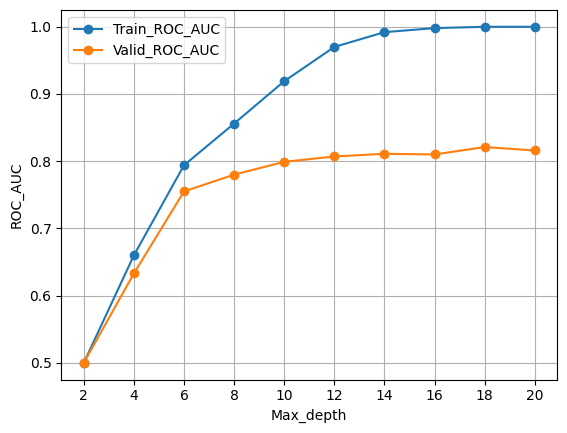

In [ ]:
plt.plot(max_depth, scores_RF['train'], label = 'Train_ROC_AUC', marker = 'o')
plt.plot(max_depth, scores_RF['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('Max_depth')
plt.ylabel('ROC_AUC')
plt.xticks(max_depth)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#create an empty list to store min_samples_split values
min_samples_split = []

#createa an empty dictionary to store the scores

scores_RF2 = { 'train': [],
             'valid': []
              }

#make iterations over min_samples_split
for k in range(2,22,2):
  print(f'min_samples_split: {k}')

  #append the values of min_samples_split in to the list
  min_samples_split.append(k)

  #build the forest
  RF_class2 = RandomForestClassifier(min_samples_split= k)

  #fit, predict, and score the training set
  RF_class2.fit(X_train, y_train['__churn'])
  value_for_train = RF_class2.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_RFT2 = metric_for_churn(y_true= y_train['__churn'], y_score=value_for_train)
  scores_RF2['train'].append(score_RFT2)

  #predict, and score the validation set
  value_for_valid = RF_class2.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_RFV2 = metric_for_churn( y_true= y_valid['__churn'], y_score= value_for_valid)
  scores_RF2['valid'].append(score_RFV2)

  print(f'Train_AUC: {score_RFT2}')
  print(f'Valid_AUC: {score_RFV2}')
  print('\n')

min_samples_split: 2
Train_AUC: 1.0
Valid_AUC: 0.812


min_samples_split: 4
Train_AUC: 0.999
Valid_AUC: 0.815


min_samples_split: 6
Train_AUC: 0.991
Valid_AUC: 0.818


min_samples_split: 8
Train_AUC: 0.979
Valid_AUC: 0.822


min_samples_split: 10
Train_AUC: 0.966
Valid_AUC: 0.814


min_samples_split: 12
Train_AUC: 0.954
Valid_AUC: 0.813


min_samples_split: 14
Train_AUC: 0.948
Valid_AUC: 0.817


min_samples_split: 16
Train_AUC: 0.94
Valid_AUC: 0.817


min_samples_split: 18
Train_AUC: 0.936
Valid_AUC: 0.811


min_samples_split: 20
Train_AUC: 0.928
Valid_AUC: 0.811




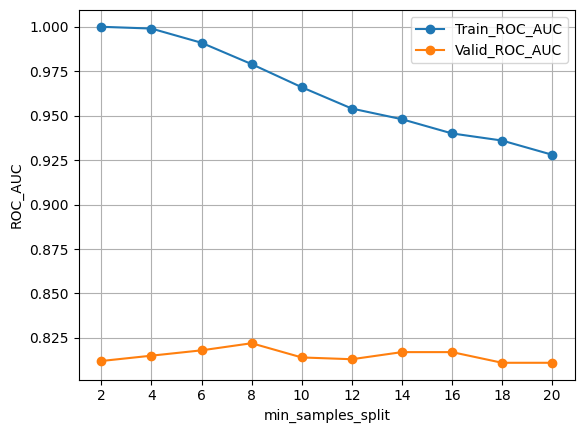

In [ ]:
plt.plot(min_samples_split, scores_RF2['train'], label = 'Train_ROC_AUC', marker = 'o')
plt.plot(min_samples_split, scores_RF2['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('min_samples_split')
plt.ylabel('ROC_AUC')
plt.xticks(min_samples_split)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#create an empty list to store min_samples_leaf values
min_samples_leaf = []

#createa an empty dictionary to store the scores

scores_RF3 = { 'train': [],
             'valid': []
              }

#make iterations over min_samples_leaf
for k in range(2,22,2):
  print(f'min_samples_leaf: {k}')

  #append the values of min_samples_leaf in to the list
  min_samples_leaf.append(k)

  #build the forest
  RF_class3 = RandomForestClassifier(min_samples_leaf= k)

  #fit, predict, and score the training set
  RF_class3.fit(X_train, y_train['__churn'])
  value_for_train = RF_class3.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_RFT3 = metric_for_churn(y_true= y_train['__churn'], y_score=value_for_train)
  scores_RF3['train'].append(score_RFT3)

  #predict, and score the validation set
  value_for_valid = RF_class3.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_RFV3 = metric_for_churn( y_true= y_valid['__churn'], y_score= value_for_valid)
  scores_RF3['valid'].append(score_RFV3)

  print(f'Train_AUC: {score_RFT3}')
  print(f'Valid_AUC: {score_RFV3}')
  print('\n')

min_samples_leaf: 2
Train_AUC: 0.988
Valid_AUC: 0.817


min_samples_leaf: 4
Train_AUC: 0.939
Valid_AUC: 0.814


min_samples_leaf: 6
Train_AUC: 0.912
Valid_AUC: 0.813


min_samples_leaf: 8
Train_AUC: 0.897
Valid_AUC: 0.812


min_samples_leaf: 10
Train_AUC: 0.884
Valid_AUC: 0.801


min_samples_leaf: 12
Train_AUC: 0.874
Valid_AUC: 0.794


min_samples_leaf: 14
Train_AUC: 0.862
Valid_AUC: 0.796


min_samples_leaf: 16
Train_AUC: 0.862
Valid_AUC: 0.801


min_samples_leaf: 18
Train_AUC: 0.849
Valid_AUC: 0.789


min_samples_leaf: 20
Train_AUC: 0.85
Valid_AUC: 0.787




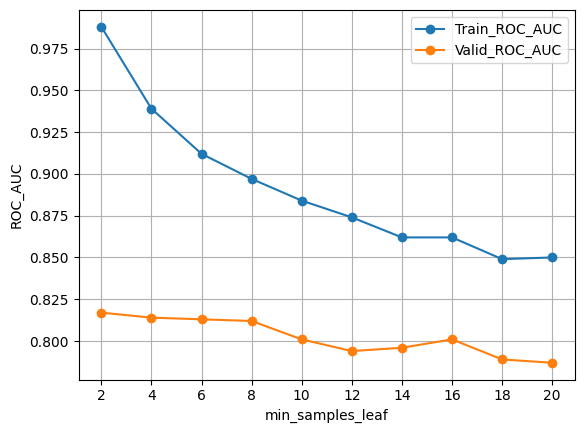

In [ ]:
plt.plot(min_samples_leaf, scores_RF3['train'], label = 'Train_ROC_AUC', marker = 'o')
plt.plot(min_samples_leaf, scores_RF3['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('min_samples_leaf')
plt.ylabel('ROC_AUC')
plt.xticks(min_samples_leaf)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#Best model for Random Forest classifier

#select the training data
name, X_, y_ = get_X_y[0]

#create a range for the hyperparameters max_depth and other

#build the forest
RF_class_best = RandomForestClassifier(random_state= 47, max_depth=10, min_samples_split=8, min_samples_leaf=8 )

#fit the model
RF_class_best.fit(X_, y_['__churn'])

#make predictions
for name, X_, y_ in get_X_y:
  value = RF_class_best.predict(X_)
 #convert all negative predictions to zero
  value[value < 0] = 0
    #append the values of the prediction
  y_['__price_pedict_class_best_RF'] = value

for name, X_, y_ in get_X_y:
  score = metric_for_churn(y_true = y_['__churn'], y_score = y_['__price_pedict_class_best_RF'])
  print(f'{name:10s}: {score:.4f}')

train     : 0.8760
valid     : 0.8030


<Axes: >

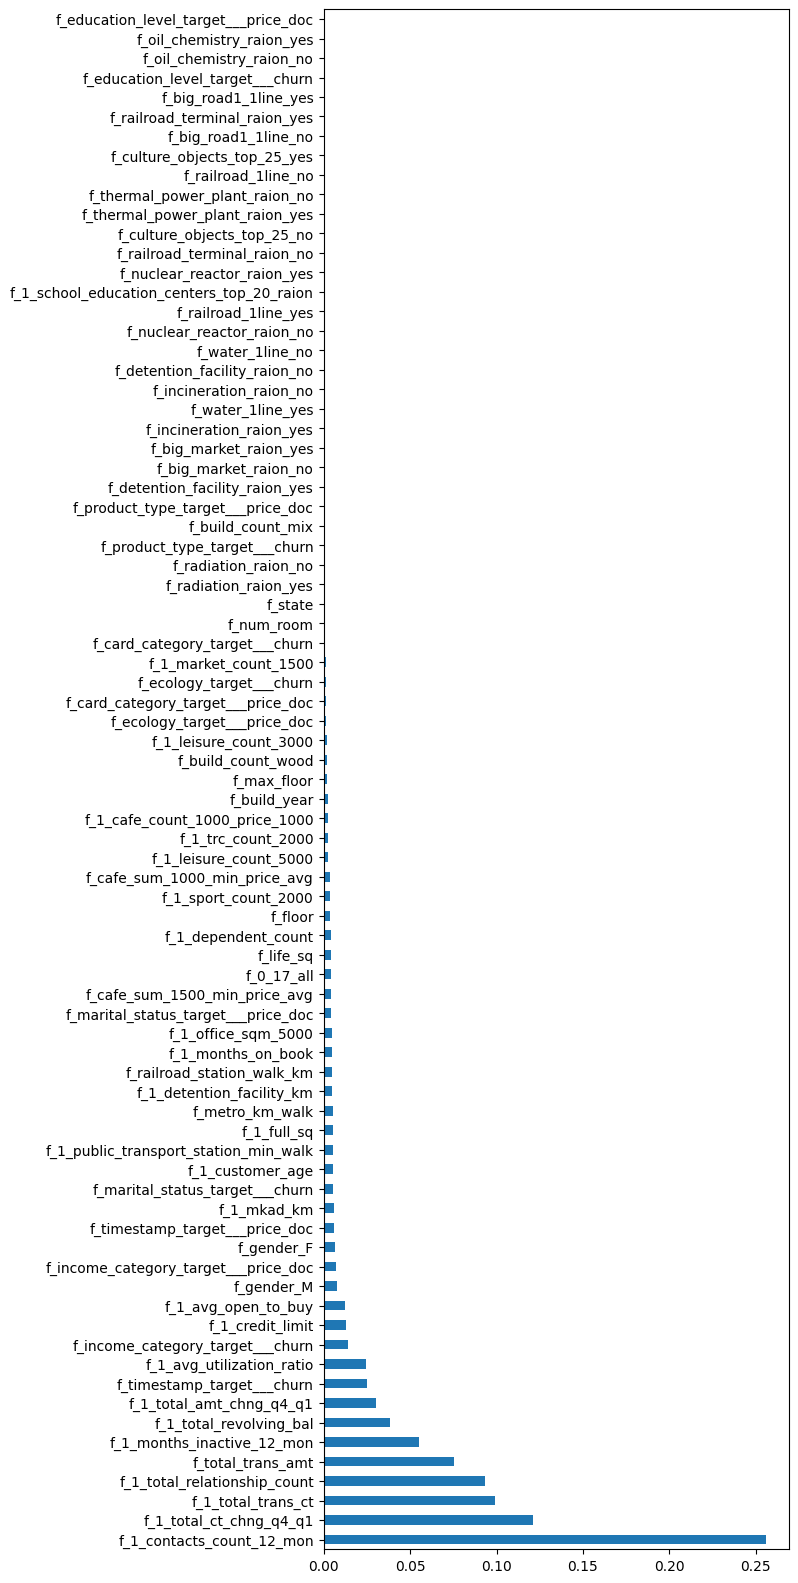

In [206]:
RF_class_best_importances = (pd.Series(RF_class_best.feature_importances_, index = X_train.columns.tolist()).sort_values(ascending = False).round(4))
RF_class_best_importances.plot(kind = 'barh', figsize=(6, 20))

Hist Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

#create an empty list to store max_depth values
max_depth = []

#createa an empty dictionary to store the scores

scores_HGB = { 'train': [],
             'valid': []
              }

#make iterations over max_depth
for k in range(2,22,2):
  print(f'Max_depth: {k}')

  #append the values of max_depth in to the list
  max_depth.append(k)

  #build the forest
  HGB_class = HistGradientBoostingClassifier(max_depth= k)

  #fit, predict, and score the training set
  HGB_class.fit(X_train, y_train['__churn'])
  value_for_train = HGB_class.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_HGBT = metric_for_churn(y_true= y_train['__churn'], y_score=value_for_train)
  scores_HGB['train'].append(score_HGBT)

  #predict, and score the validation set
  value_for_valid = HGB_class.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_HGBV = metric_for_churn( y_true= y_valid['__churn'], y_score= value_for_valid)
  scores_HGB['valid'].append(score_HGBV)

  print(f'Train_AUC: {score_HGBT}')
  print(f'Valid_AUC: {score_HGBV}')
  print('\n')



Max_depth: 2
Train_AUC: 0.874
Valid_AUC: 0.851


Max_depth: 4
Train_AUC: 0.915
Valid_AUC: 0.861


Max_depth: 6
Train_AUC: 0.961
Valid_AUC: 0.856


Max_depth: 8
Train_AUC: 0.978
Valid_AUC: 0.856


Max_depth: 10
Train_AUC: 0.972
Valid_AUC: 0.86


Max_depth: 12
Train_AUC: 0.975
Valid_AUC: 0.855


Max_depth: 14
Train_AUC: 0.974
Valid_AUC: 0.858


Max_depth: 16
Train_AUC: 0.974
Valid_AUC: 0.86


Max_depth: 18
Train_AUC: 0.955
Valid_AUC: 0.857


Max_depth: 20
Train_AUC: 0.945
Valid_AUC: 0.856




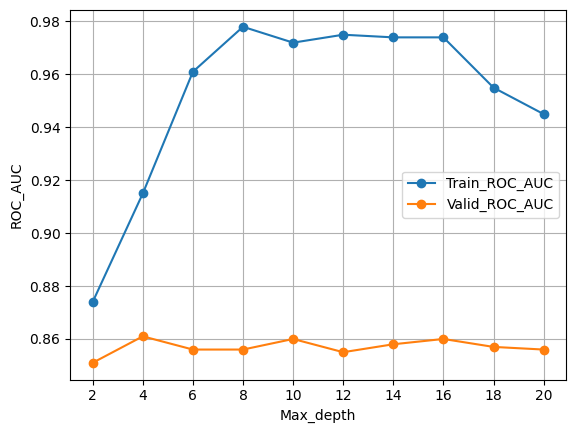

In [ ]:
plt.plot(max_depth, scores_HGB['train'], label = 'Train_ROC_AUC', marker = 'o')
plt.plot(max_depth, scores_HGB['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('Max_depth')
plt.ylabel('ROC_AUC')
plt.xticks(max_depth)
plt.grid()
plt.legend()
plt.show()

In [ ]:

#create an empty list to store learning_rate values
learning_rate = []

#createa an empty dictionary to store the scores

scores_HGB1 = { 'train': [],
             'valid': []
              }

#make iterations over learning_rate
for k in [0.01, 0.05, 0.1, 0.5, 1.0, 1.1, 1.4, 1.5, 1.8, 2.0]:
  print(f'learning_rate: {k}')

  #append the values of learning_rate in to the list
  learning_rate.append(k)

  #build the forest
  HGB_class1 = HistGradientBoostingClassifier(learning_rate= k)

  #fit, predict, and score the training set
  HGB_class1.fit(X_train, y_train['__churn'])
  value_for_train = HGB_class1.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_HGBT1 = metric_for_churn(y_true= y_train['__churn'], y_score=value_for_train)
  scores_HGB1['train'].append(score_HGBT1)

  #predict, and score the validation set
  value_for_valid = HGB_class1.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_HGBV1 = metric_for_churn( y_true= y_valid['__churn'], y_score= value_for_valid)
  scores_HGB1['valid'].append(score_HGBV1)

  print(f'Train_AUC: {score_HGBT1}')
  print(f'Valid_AUC: {score_HGBV1}')
  print('\n')

learning_rate: 0.01
Train_AUC: 0.822
Valid_AUC: 0.78


learning_rate: 0.05
Train_AUC: 0.94
Valid_AUC: 0.859


learning_rate: 0.1
Train_AUC: 0.974
Valid_AUC: 0.857


learning_rate: 0.5
Train_AUC: 0.976
Valid_AUC: 0.842


learning_rate: 1.0
Train_AUC: 0.899
Valid_AUC: 0.821


learning_rate: 1.1
Train_AUC: 0.901
Valid_AUC: 0.809


learning_rate: 1.4
Train_AUC: 0.86
Valid_AUC: 0.807


learning_rate: 1.5
Train_AUC: 0.845
Valid_AUC: 0.795


learning_rate: 1.8
Train_AUC: 0.763
Valid_AUC: 0.737


learning_rate: 2.0
Train_AUC: 0.707
Valid_AUC: 0.678




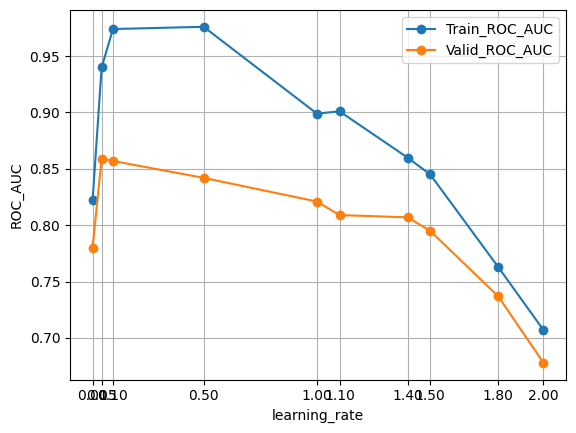

In [ ]:
plt.plot(learning_rate, scores_HGB1['train'], label = 'Train_ROC_AUC', marker = 'o')
plt.plot(learning_rate, scores_HGB1['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('learning_rate')
plt.ylabel('ROC_AUC')
plt.xticks(learning_rate)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#create an empty list to store l2_regularization values
l2_regularization = []

#createa an empty dictionary to store the scores

scores_HGB2 = { 'train': [],
             'valid': []
              }

#make iterations over l2_regularization
for k in [0.01, 0.05, 0.1, 0.5, 1.0, 1.1, 1.4, 1.5, 1.8, 2.0]:
  print(f'l2_regularization: {k}')

  #append the values of l2_regularization in to the list
  l2_regularization.append(k)

  #build the forest
  HGB_class2 = HistGradientBoostingClassifier(l2_regularization= k)

  #fit, predict, and score the training set
  HGB_class2.fit(X_train, y_train['__churn'])
  value_for_train = HGB_class2.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_HGBT2 = metric_for_churn(y_true= y_train['__churn'], y_score=value_for_train)
  scores_HGB2['train'].append(score_HGBT2)

  #predict, and score the validation set
  value_for_valid = HGB_class2.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_HGBV2 = metric_for_churn( y_true= y_valid['__churn'], y_score= value_for_valid)
  scores_HGB2['valid'].append(score_HGBV2)

  print(f'Train_AUC: {score_HGBT1}')
  print(f'Valid_AUC: {score_HGBV1}')
  print('\n')

l2_regularization: 0.01
Train_AUC: 0.707
Valid_AUC: 0.678


l2_regularization: 0.05
Train_AUC: 0.707
Valid_AUC: 0.678


l2_regularization: 0.1
Train_AUC: 0.707
Valid_AUC: 0.678


l2_regularization: 0.5
Train_AUC: 0.707
Valid_AUC: 0.678


l2_regularization: 1.0
Train_AUC: 0.707
Valid_AUC: 0.678


l2_regularization: 1.1
Train_AUC: 0.707
Valid_AUC: 0.678


l2_regularization: 1.4
Train_AUC: 0.707
Valid_AUC: 0.678


l2_regularization: 1.5
Train_AUC: 0.707
Valid_AUC: 0.678


l2_regularization: 1.8
Train_AUC: 0.707
Valid_AUC: 0.678


l2_regularization: 2.0
Train_AUC: 0.707
Valid_AUC: 0.678




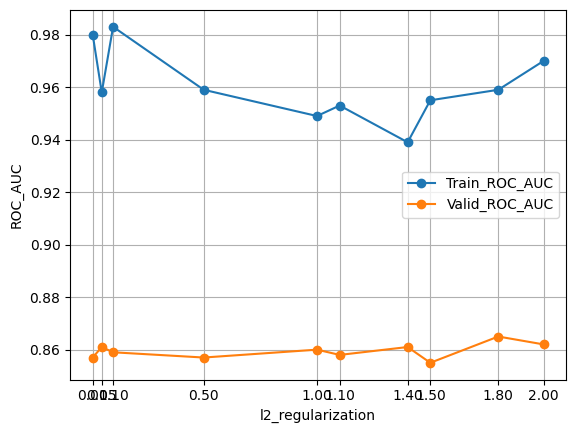

In [ ]:
plt.plot(l2_regularization, scores_HGB2['train'], label = 'Train_ROC_AUC', marker = 'o')
plt.plot(l2_regularization, scores_HGB2['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('l2_regularization')
plt.ylabel('ROC_AUC')
plt.xticks(l2_regularization)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#Best Hist Gradient Boosting cassifier

#select the training data
name, X_, y_ = get_X_y[0]

#create a range for the hyperparameters max_depth and other

#build the forest
HGB_class_best = HistGradientBoostingClassifier(random_state= 47,max_depth=4, learning_rate= 0.05, l2_regularization= 0.05 )

#fit the model
HGB_class_best.fit(X_, y_['__churn'])

#make predictions
for name, X_, y_ in get_X_y:
  value = HGB_class_best.predict(X_)
 #convert all negative predictions to zero
  value[value < 0] = 0
    #append the values of the prediction
  y_['__price_pedict_class_best_HGB'] = value

for name, X_, y_ in get_X_y:
  score = metric_for_churn(y_true = y_['__churn'], y_score = y_['__price_pedict_class_best_HGB'])
  print(f'{name:10s}: {score:.4f}')

train     : 0.8910
valid     : 0.8530


LightGBM

In [ ]:
from lightgbm import LGBMClassifier

#create an empty list to store max_depth values
max_depth = []

#createa an empty dictionary to store the scores

scores_LGBM = { 'train': [],
             'valid': []
              }

#make iterations over max_depth
for k in range(2,22,2):
  print(f'Max_depth: {k}')

  #append the values of max_depth in to the list
  max_depth.append(k)

  #build the forest
  LGBM_class = LGBMClassifier(max_depth= k)

  #fit, predict, and score the training set
  LGBM_class.fit(X_train, y_train['__churn'])
  value_for_train = LGBM_class.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_LGBM = metric_for_churn(y_true= y_train['__churn'], y_score=value_for_train)
  scores_LGBM['train'].append(score_LGBM)

  #predict, and score the validation set
  value_for_valid = LGBM_class.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_LGBM = metric_for_churn( y_true= y_valid['__churn'], y_score= value_for_valid)
  scores_LGBM['valid'].append(score_LGBM)

  print(f'Train_AUC: {score_LGBM}')
  print(f'Valid_AUC: {score_LGBM}')
  print('\n')

Max_depth: 2
[LightGBM] [Info] Number of positive: 1652, number of negative: 8589
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5570
[LightGBM] [Info] Number of data points in the train set: 10241, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161312 -> initscore=-1.648496
[LightGBM] [Info] Start training from score -1.648496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

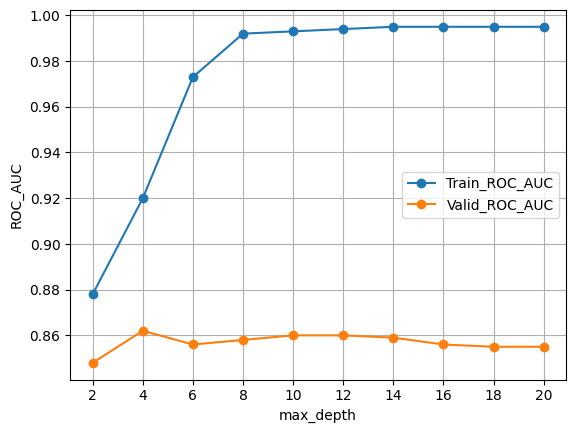

In [ ]:
plt.plot(max_depth, scores_LGBM['train'], label = 'Train_ROC_AUC', marker = 'o')
plt.plot(max_depth, scores_LGBM['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('max_depth')
plt.ylabel('ROC_AUC')
plt.xticks(max_depth)
plt.grid()
plt.legend()
plt.show()

In [ ]:

#create an empty list to store learning_rate values
learning_rate = []

#createa an empty dictionary to store the scores

scores_LGBM1 = { 'train': [],
             'valid': []
              }

#make iterations over learning_rate
for k in [0.01, 0.05, 0.1, 0.5, 1.0, 1.1, 1.4, 1.5, 1.8, 2.0]:
  print(f'learning_rate: {k}')

  #append the values of learning_rate in to the list
  learning_rate.append(k)

  #build the forest
  LGBM_class1 = LGBMClassifier(learning_rate= k)

  #fit, predict, and score the training set
  LGBM_class1.fit(X_train, y_train['__churn'])
  value_for_train = LGBM_class1.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_LGBM1 = metric_for_churn(y_true= y_train['__churn'], y_score=value_for_train)
  scores_LGBM1['train'].append(score_LGBM1)

  #predict, and score the validation set
  value_for_valid = LGBM_class1.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_LGBM1 = metric_for_churn( y_true= y_valid['__churn'], y_score= value_for_valid)
  scores_LGBM1['valid'].append(score_LGBM1)

  print(f'Train_AUC: {score_LGBM1}')
  print(f'Valid_AUC: {score_LGBM1}')
  print('\n')

learning_rate: 0.01
[LightGBM] [Info] Number of positive: 1652, number of negative: 8589
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5570
[LightGBM] [Info] Number of data points in the train set: 10241, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161312 -> initscore=-1.648496
[LightGBM] [Info] Start training from score -1.648496
Train_AUC: 0.777
Valid_AUC: 0.777


learning_rate: 0.05
[LightGBM] [Info] Number of positive: 1652, number of negative: 8589
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5570
[LightGBM] [Info] Number of data points

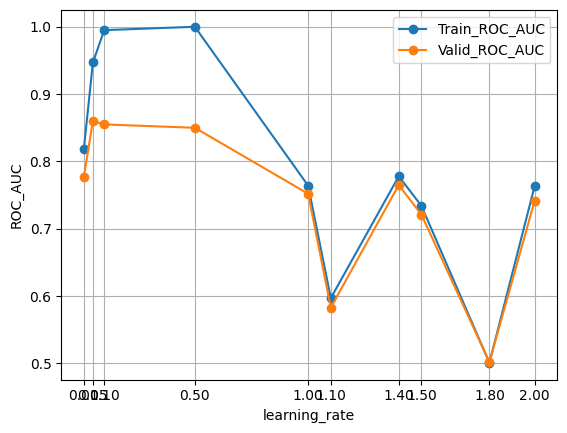

In [ ]:
plt.plot(learning_rate, scores_LGBM1['train'], label = 'Train_ROC_AUC', marker = 'o')
plt.plot(learning_rate, scores_LGBM1['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('learning_rate')
plt.ylabel('ROC_AUC')
plt.xticks(learning_rate)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#Best model for LightGBM classifier

#select the training data
name, X_, y_ = get_X_y[0]

#create a range for the hyperparameters max_depth and other

#build the forest
LGBM_class_best = LGBMClassifier(random_state= 47, max_depth=4, learning_rate= 0.05 )

#fit the model
LGBM_class_best.fit(X_, y_['__churn'])

#make predictions
for name, X_, y_ in get_X_y:
  value = LGBM_class_best.predict(X_)
 #convert all negative predictions to zero
  value[value < 0] = 0
    #append the values of the prediction
  y_['__price_pedict_class_best_LGBM'] = value

for name, X_, y_ in get_X_y:
  score = metric_for_churn(y_true = y_['__churn'], y_score = y_['__price_pedict_class_best_LGBM'])
  print(f'{name:10s}: {score:.4f}')

[LightGBM] [Info] Number of positive: 1652, number of negative: 8589
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5570
[LightGBM] [Info] Number of data points in the train set: 10241, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161312 -> initscore=-1.648496
[LightGBM] [Info] Start training from score -1.648496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

<Axes: >

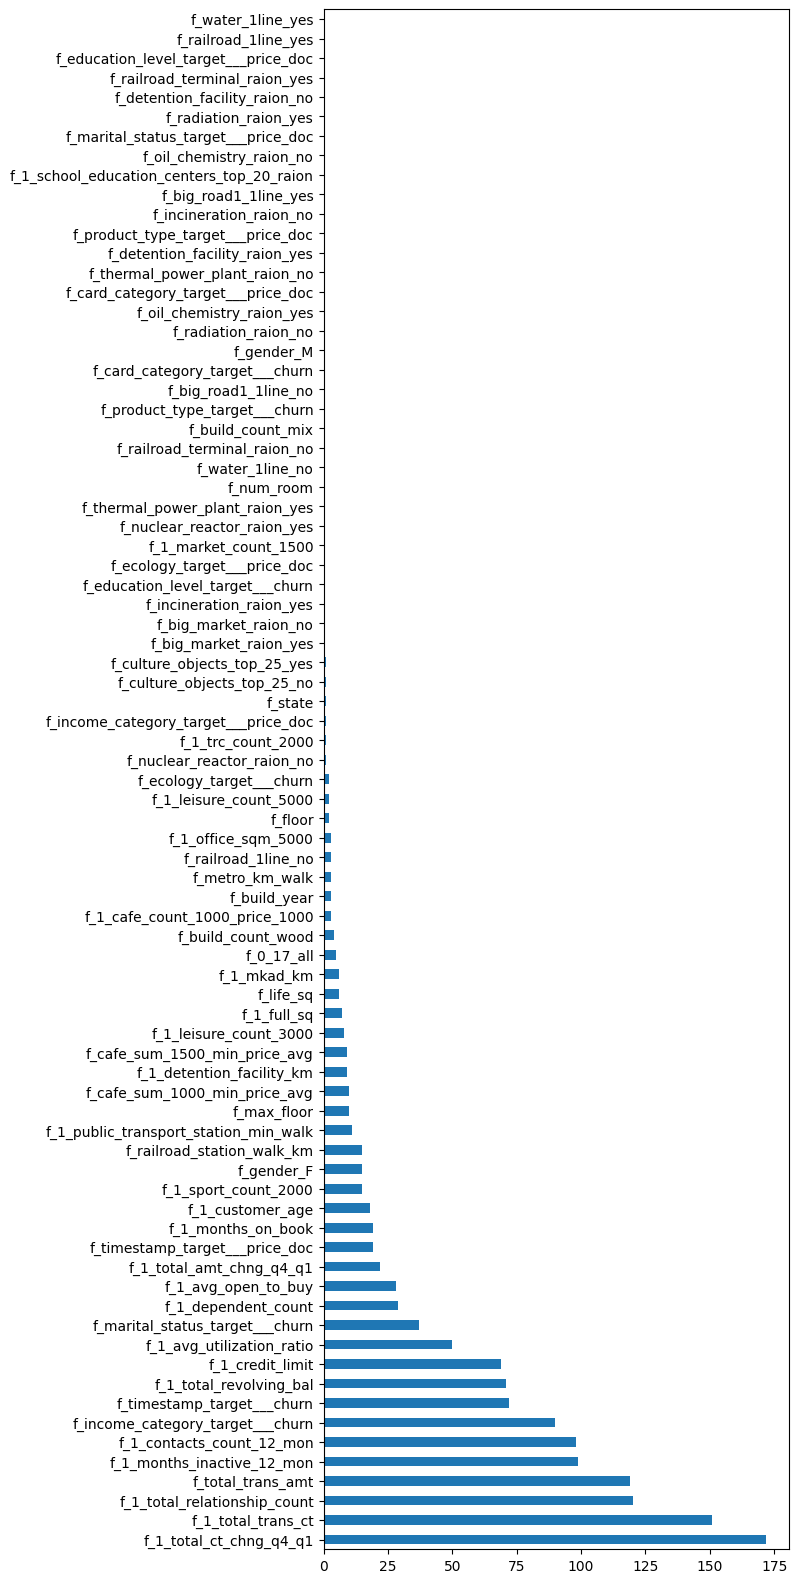

In [208]:
LGBM_class_best_importances = (pd.Series(LGBM_class_best.feature_importances_, index = X_train.columns.tolist()).sort_values(ascending = False).round(4))
LGBM_class_best_importances.plot(kind = 'barh', figsize=(6, 20))

XG Boost

In [19]:
from xgboost import XGBClassifier

In [ ]:
#create an empty list to store max_depth values
max_depth = []

#createa an empty dictionary to store the scores

scores_XGB = { 'train': [],
             'valid': []
              }

#make iterations over max_depth
for k in range(2,22,2):
  print(f'Max_depth: {k}')

  #append the values of max_depth in to the list
  max_depth.append(k)

  #build the forest
  XGB_class = XGBClassifier(max_depth= k)

  #fit, predict, and score the training set
  XGB_class.fit(X_train, y_train['__churn'])
  value_for_train = XGB_class.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_XGB = metric_for_churn(y_true= y_train['__churn'], y_score=value_for_train)
  scores_XGB['train'].append(score_XGB)

  #predict, and score the validation set
  value_for_valid = XGB_class.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_XGB = metric_for_churn( y_true= y_valid['__churn'], y_score= value_for_valid)
  scores_XGB['valid'].append(score_XGB)

  print(f'Train_AUC: {score_XGB}')
  print(f'Valid_AUC: {score_XGB}')
  print('\n')

Max_depth: 2
Train_AUC: 0.861
Valid_AUC: 0.861


Max_depth: 4
Train_AUC: 0.85
Valid_AUC: 0.85


Max_depth: 6
Train_AUC: 0.853
Valid_AUC: 0.853


Max_depth: 8
Train_AUC: 0.851
Valid_AUC: 0.851


Max_depth: 10
Train_AUC: 0.855
Valid_AUC: 0.855


Max_depth: 12
Train_AUC: 0.852
Valid_AUC: 0.852


Max_depth: 14
Train_AUC: 0.851
Valid_AUC: 0.851


Max_depth: 16
Train_AUC: 0.851
Valid_AUC: 0.851


Max_depth: 18
Train_AUC: 0.851
Valid_AUC: 0.851


Max_depth: 20
Train_AUC: 0.853
Valid_AUC: 0.853




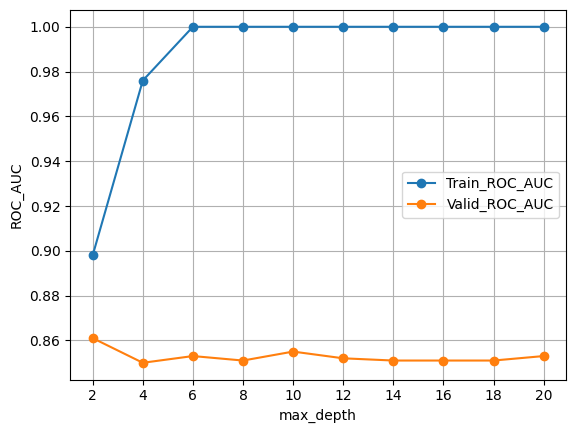

In [ ]:
plt.plot(max_depth, scores_XGB['train'], label = 'Train_ROC_AUC', marker = 'o')
plt.plot(max_depth, scores_XGB['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('max_depth')
plt.ylabel('ROC_AUC')
plt.xticks(max_depth)
plt.grid()
plt.legend()
plt.show()

In [ ]:

#create an empty list to store learning_rate values
learning_rate = []

#createa an empty dictionary to store the scores

scores_XGB1 = { 'train': [],
             'valid': []
              }

#make iterations over learning_rate
for k in [0.01, 0.05, 0.1, 0.5, 1.0, 1.1, 1.4, 1.5, 1.8, 2.0]:
  print(f'learning_rate: {k}')

  #append the values of learning_rate in to the list
  learning_rate.append(k)

  #build the forest
  XGB_class1 = XGBClassifier(learning_rate = k)

  #fit, predict, and score the training set
  XGB_class1.fit(X_train, y_train['__churn'])
  value_for_train = XGB_class1.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_XGB1 = metric_for_churn(y_true= y_train['__churn'], y_score=value_for_train)
  scores_XGB1['train'].append(score_XGB1)

  #predict, and score the validation set
  value_for_valid = XGB_class1.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_XGB1 = metric_for_churn( y_true= y_valid['__churn'], y_score= value_for_valid)
  scores_XGB1['valid'].append(score_XGB1)

  print(f'Train_AUC: {score_XGB1}')
  print(f'Valid_AUC: {score_XGB1}')
  print('\n')

learning_rate: 0.01
Train_AUC: 0.767
Valid_AUC: 0.767


learning_rate: 0.05
Train_AUC: 0.859
Valid_AUC: 0.859


learning_rate: 0.1
Train_AUC: 0.859
Valid_AUC: 0.859


learning_rate: 0.5
Train_AUC: 0.851
Valid_AUC: 0.851


learning_rate: 1.0
Train_AUC: 0.842
Valid_AUC: 0.842


learning_rate: 1.1
Train_AUC: 0.838
Valid_AUC: 0.838


learning_rate: 1.4
Train_AUC: 0.808
Valid_AUC: 0.808


learning_rate: 1.5
Train_AUC: 0.802
Valid_AUC: 0.802


learning_rate: 1.8
Train_AUC: 0.815
Valid_AUC: 0.815


learning_rate: 2.0
Train_AUC: 0.816
Valid_AUC: 0.816




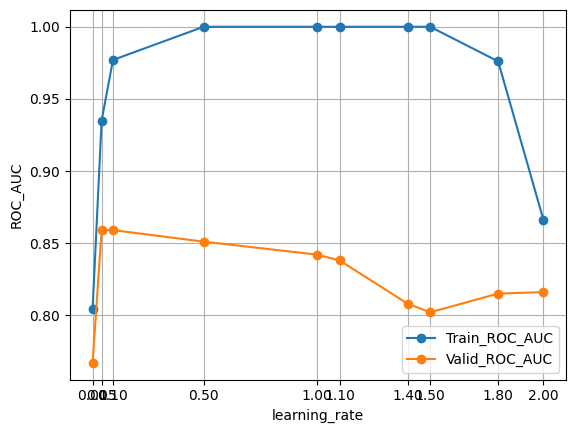

In [ ]:
plt.plot(learning_rate, scores_XGB1['train'], label = 'Train_ROC_AUC', marker = 'o')
plt.plot(learning_rate, scores_XGB1['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('learning_rate')
plt.ylabel('ROC_AUC')
plt.xticks(learning_rate)
plt.grid()
plt.legend()
plt.show()

In [139]:
#Best model for XGB Classifier

#select the training data
name, X_, y_ = get_X_y[0]

#create a range for the hyperparameters max_depth and other

#build the forest
XGB_class_best = XGBClassifier(random_state= 47, max_depth=3, learning_rate = 0.1 )

#fit the model
XGB_class_best.fit(X_, y_['__churn'])

#make predictions
for name, X_, y_ in get_X_y:
  value = XGB_class_best.predict(X_)
 #convert all negative predictions to zero
  value[value < 0] = 0
    #append the values of the prediction
  y_['__price_pedict_class_best_XGB'] = value

for name, X_, y_ in get_X_y:
  score = metric_for_churn(y_true = y_['__churn'], y_score = y_['__price_pedict_class_best_XGB'])
  print(f'{name:10s}: {score:.4f}')

train     : 0.8930
valid     : 0.8560


<Axes: >

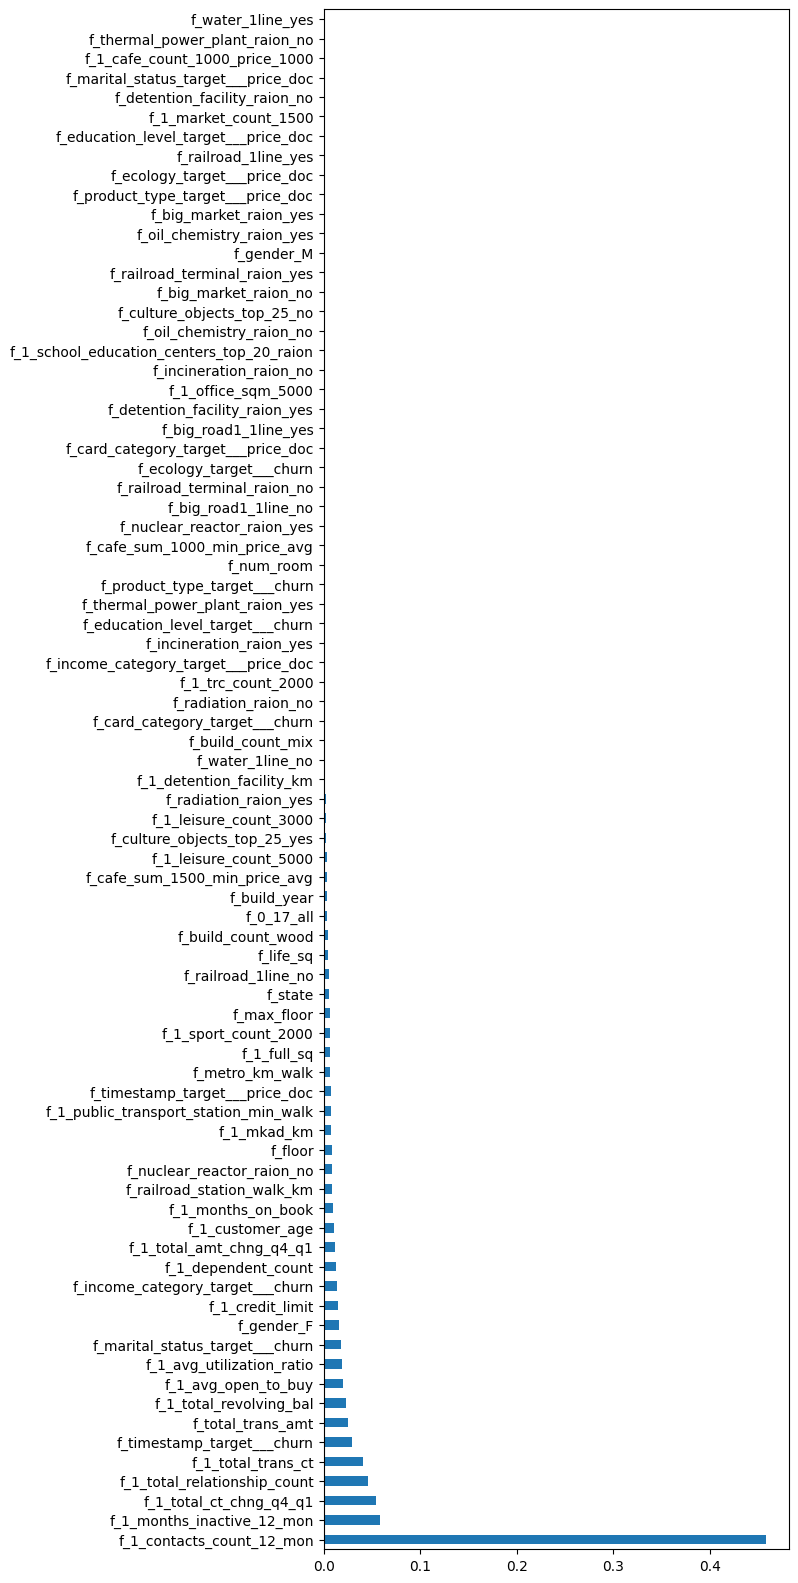

In [209]:
XGB_class_best_importances = (pd.Series(XGB_class_best.feature_importances_, index = X_train.columns.tolist()).sort_values(ascending = False).round(4))
XGB_class_best_importances.plot(kind = 'barh', figsize=(6, 20))

CatBoost

In [143]:
from catboost import CatBoostClassifier

In [180]:


#create an empty list to store max_depth values
max_depth = []

#createa an empty dictionary to store the scores

scores_CB = { 'train': [],
             'valid': []
              }

#make iterations over max_depth
for k in range(2,14,2):
  print(f'Max_depth: {k}')

  #append the values of max_depth in to the list
  max_depth.append(k)

  #build the forest
  CB_class = CatBoostClassifier(max_depth= k, iterations = 10)

  #fit, predict, and score the training set
  CB_class.fit(X_train, y_train['__churn'])
  value_for_train = CB_class.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_CB = metric_for_churn(y_true= y_train['__churn'], y_score=value_for_train)
  scores_CB['train'].append(score_CB)

  #predict, and score the validation set
  value_for_valid = CB_class.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_CB = metric_for_churn( y_true= y_valid['__churn'], y_score= value_for_valid)
  scores_CB['valid'].append(score_CB)

  print(f'Train_AUC: {score_CB}')
  print(f'Valid_AUC: {score_CB}')
  print('\n')

Max_depth: 2
Learning rate set to 0.5
0:	learn: 0.2838311	total: 10.2ms	remaining: 91.5ms
1:	learn: 0.2392310	total: 19.3ms	remaining: 77.2ms
2:	learn: 0.2129059	total: 24.3ms	remaining: 56.8ms
3:	learn: 0.1989184	total: 37.3ms	remaining: 56ms
4:	learn: 0.1943300	total: 49.2ms	remaining: 49.2ms
5:	learn: 0.1858430	total: 60.2ms	remaining: 40.1ms
6:	learn: 0.1821367	total: 69.5ms	remaining: 29.8ms
7:	learn: 0.1775214	total: 78.9ms	remaining: 19.7ms
8:	learn: 0.1705687	total: 83.5ms	remaining: 9.28ms
9:	learn: 0.1680823	total: 89ms	remaining: 0us
Train_AUC: 0.826
Valid_AUC: 0.826


Max_depth: 4
Learning rate set to 0.5
0:	learn: 0.2739383	total: 30.5ms	remaining: 274ms
1:	learn: 0.2071463	total: 58.5ms	remaining: 234ms
2:	learn: 0.1838432	total: 84.9ms	remaining: 198ms
3:	learn: 0.1726179	total: 118ms	remaining: 177ms
4:	learn: 0.1679729	total: 138ms	remaining: 138ms
5:	learn: 0.1632990	total: 159ms	remaining: 106ms
6:	learn: 0.1599507	total: 193ms	remaining: 82.5ms
7:	learn: 0.1559119	t

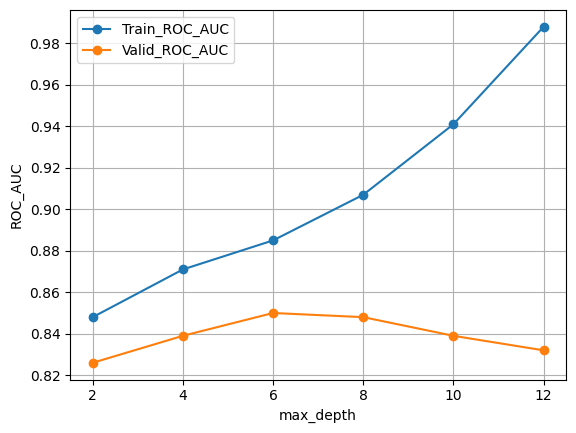

In [181]:
plt.plot(max_depth, scores_CB['train'], label = 'Train_ROC_AUC', marker = 'o')
plt.plot(max_depth, scores_CB['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('max_depth')
plt.ylabel('ROC_AUC')
plt.xticks(max_depth)
plt.grid()
plt.legend()
plt.show()

In [145]:


#create an empty list to store learning_rate values
learning_rate = []

#createa an empty dictionary to store the scores

scores_CB1 = { 'train': [],
             'valid': []
              }

#make iterations over learning_rate
for k in [0.01, 0.05, 0.1, 0.5, 1.0, 1.1, 1.4, 1.5, 1.8, 2.0]:
  print(f'learning_rate: {k}')

  #append the values of learning_rate in to the list
  learning_rate.append(k)

  #build the forest
  CB_class1 = CatBoostClassifier(learning_rate= k)

  #fit, predict, and score the training set
  CB_class1.fit(X_train, y_train['__churn'])
  value_for_train = CB_class1.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_CB1 = metric_for_churn(y_true= y_train['__churn'], y_score=value_for_train)
  scores_CB1['train'].append(score_CB1)

  # predict, and score the validation set
  value_for_valid = CB_class1.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_CB1 = metric_for_churn( y_true= y_valid['__churn'], y_score= value_for_valid)
  scores_CB1['valid'].append(score_CB1)

  print(f'Train_AUC: {score_CB1}')
  print(f'Valid_AUC: {score_CB1}')
  print('\n')

Streaming output truncated to the last 5000 lines.
36:	learn: 0.3129967	total: 1.55s	remaining: 40.3s
37:	learn: 0.3089102	total: 1.57s	remaining: 39.8s
38:	learn: 0.3046952	total: 1.59s	remaining: 39.2s
39:	learn: 0.3006583	total: 1.6s	remaining: 38.5s
40:	learn: 0.2968867	total: 1.65s	remaining: 38.6s
41:	learn: 0.2928594	total: 1.7s	remaining: 38.8s
42:	learn: 0.2890227	total: 1.74s	remaining: 38.6s
43:	learn: 0.2851758	total: 1.76s	remaining: 38.4s
44:	learn: 0.2815927	total: 1.79s	remaining: 38.1s
45:	learn: 0.2780559	total: 1.83s	remaining: 37.9s
46:	learn: 0.2746716	total: 1.86s	remaining: 37.7s
47:	learn: 0.2715582	total: 1.89s	remaining: 37.5s
48:	learn: 0.2685693	total: 1.92s	remaining: 37.3s
49:	learn: 0.2658118	total: 1.94s	remaining: 36.9s
50:	learn: 0.2630220	total: 1.98s	remaining: 36.8s
51:	learn: 0.2602440	total: 2s	remaining: 36.4s
52:	learn: 0.2575057	total: 2.02s	remaining: 36s
53:	learn: 0.2547967	total: 2.04s	remaining: 35.8s
54:	learn: 0.2523064	total: 2.06s	rema

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


11:	learn: 0.1181089	total: 171ms	remaining: 14.1s
12:	learn: 0.1131281	total: 184ms	remaining: 14s
13:	learn: 0.1069867	total: 196ms	remaining: 13.8s
14:	learn: 0.1019897	total: 208ms	remaining: 13.7s
15:	learn: 0.0986572	total: 220ms	remaining: 13.5s
16:	learn: 0.0968681	total: 231ms	remaining: 13.4s
17:	learn: 0.0953619	total: 243ms	remaining: 13.2s
18:	learn: 0.0920303	total: 254ms	remaining: 13.1s
19:	learn: 0.0899704	total: 266ms	remaining: 13s
20:	learn: 0.0872856	total: 278ms	remaining: 12.9s
21:	learn: 0.0839837	total: 289ms	remaining: 12.9s
22:	learn: 0.0824669	total: 300ms	remaining: 12.8s
23:	learn: 0.0789019	total: 312ms	remaining: 12.7s
24:	learn: 0.0766885	total: 323ms	remaining: 12.6s
25:	learn: 0.0750319	total: 335ms	remaining: 12.5s
26:	learn: 0.0720611	total: 347ms	remaining: 12.5s
27:	learn: 0.0699598	total: 359ms	remaining: 12.5s
28:	learn: 0.0678412	total: 374ms	remaining: 12.5s
29:	learn: 0.0654652	total: 395ms	remaining: 12.8s
30:	learn: 0.0639772	total: 406ms	r

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


12:	learn: 0.1167865	total: 168ms	remaining: 12.7s
13:	learn: 0.1145550	total: 180ms	remaining: 12.7s
14:	learn: 0.1113557	total: 191ms	remaining: 12.6s
15:	learn: 0.1070684	total: 203ms	remaining: 12.5s
16:	learn: 0.1038018	total: 214ms	remaining: 12.4s
17:	learn: 0.0992226	total: 226ms	remaining: 12.3s
18:	learn: 0.0940623	total: 238ms	remaining: 12.3s
19:	learn: 0.0904403	total: 250ms	remaining: 12.3s
20:	learn: 0.0877571	total: 264ms	remaining: 12.3s
21:	learn: 0.0835577	total: 275ms	remaining: 12.2s
22:	learn: 0.0801702	total: 287ms	remaining: 12.2s
23:	learn: 0.0771537	total: 298ms	remaining: 12.1s
24:	learn: 0.0759312	total: 309ms	remaining: 12.1s
25:	learn: 0.0725954	total: 321ms	remaining: 12s
26:	learn: 0.0700216	total: 332ms	remaining: 12s
27:	learn: 0.0681396	total: 344ms	remaining: 11.9s
28:	learn: 0.0658507	total: 355ms	remaining: 11.9s
29:	learn: 0.0632614	total: 367ms	remaining: 11.9s
30:	learn: 0.0610772	total: 383ms	remaining: 12s
31:	learn: 0.0595933	total: 395ms	rem

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2218036	total: 12ms	remaining: 12s
1:	learn: 0.1904987	total: 24.2ms	remaining: 12.1s
2:	learn: 0.1723300	total: 36.5ms	remaining: 12.1s
3:	learn: 0.1623344	total: 48.5ms	remaining: 12.1s
4:	learn: 0.1569442	total: 60.5ms	remaining: 12s
5:	learn: 0.1508023	total: 72.5ms	remaining: 12s
6:	learn: 0.1468374	total: 86.4ms	remaining: 12.3s
7:	learn: 0.1406145	total: 101ms	remaining: 12.5s
8:	learn: 0.1351443	total: 114ms	remaining: 12.6s
9:	learn: 0.1295524	total: 126ms	remaining: 12.5s
10:	learn: 0.1244521	total: 138ms	remaining: 12.4s
11:	learn: 0.1185796	total: 159ms	remaining: 13.1s
12:	learn: 0.1159703	total: 173ms	remaining: 13.1s
13:	learn: 0.1099568	total: 185ms	remaining: 13s
14:	learn: 0.1065156	total: 196ms	remaining: 12.9s
15:	learn: 0.1050841	total: 207ms	remaining: 12.7s
16:	learn: 0.1019379	total: 225ms	remaining: 13s
17:	learn: 0.1003707	total: 236ms	remaining: 12.9s
18:	learn: 0.0968388	total: 248ms	remaining: 12.8s
19:	learn: 0.0916512	total: 260ms	remaining: 1

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2385818	total: 12.1ms	remaining: 12.1s
1:	learn: 0.2389783	total: 24.3ms	remaining: 12.1s
2:	learn: 0.2048596	total: 36.8ms	remaining: 12.2s
3:	learn: 0.1974627	total: 49.4ms	remaining: 12.3s
4:	learn: 0.1842536	total: 61.7ms	remaining: 12.3s
5:	learn: 0.1762727	total: 74.4ms	remaining: 12.3s
6:	learn: 0.1667573	total: 86.7ms	remaining: 12.3s
7:	learn: 0.1611234	total: 98.2ms	remaining: 12.2s
8:	learn: 0.1544555	total: 110ms	remaining: 12.1s
9:	learn: 0.1500113	total: 122ms	remaining: 12.1s
10:	learn: 0.1454581	total: 134ms	remaining: 12s
11:	learn: 0.1404522	total: 149ms	remaining: 12.3s
12:	learn: 0.1365300	total: 165ms	remaining: 12.5s
13:	learn: 0.1321433	total: 177ms	remaining: 12.4s
14:	learn: 0.1283152	total: 189ms	remaining: 12.4s
15:	learn: 0.1239722	total: 201ms	remaining: 12.3s
16:	learn: 0.1202473	total: 216ms	remaining: 12.5s
17:	learn: 0.1177175	total: 231ms	remaining: 12.6s
18:	learn: 0.1128845	total: 243ms	remaining: 12.5s
19:	learn: 0.1089648	total: 254ms	r

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


11:	learn: 0.2444359	total: 159ms	remaining: 13.1s
12:	learn: 0.2160395	total: 180ms	remaining: 13.7s
13:	learn: 0.2333713	total: 192ms	remaining: 13.5s
14:	learn: 0.2129491	total: 204ms	remaining: 13.4s
15:	learn: 0.2316475	total: 216ms	remaining: 13.3s
16:	learn: 0.2033829	total: 229ms	remaining: 13.2s
17:	learn: 0.2160832	total: 241ms	remaining: 13.2s
18:	learn: 0.2015288	total: 253ms	remaining: 13.1s
19:	learn: 0.2161885	total: 267ms	remaining: 13.1s
20:	learn: 0.1973981	total: 280ms	remaining: 13s
21:	learn: 0.2101721	total: 292ms	remaining: 13s
22:	learn: 0.1952957	total: 305ms	remaining: 12.9s
23:	learn: 0.2078478	total: 317ms	remaining: 12.9s
24:	learn: 0.1942140	total: 330ms	remaining: 12.9s
25:	learn: 0.2076285	total: 342ms	remaining: 12.8s
26:	learn: 0.1934925	total: 355ms	remaining: 12.8s
27:	learn: 0.2059142	total: 375ms	remaining: 13s
28:	learn: 0.1932299	total: 388ms	remaining: 13s
29:	learn: 0.2051868	total: 400ms	remaining: 12.9s
30:	learn: 0.1928679	total: 412ms	remai

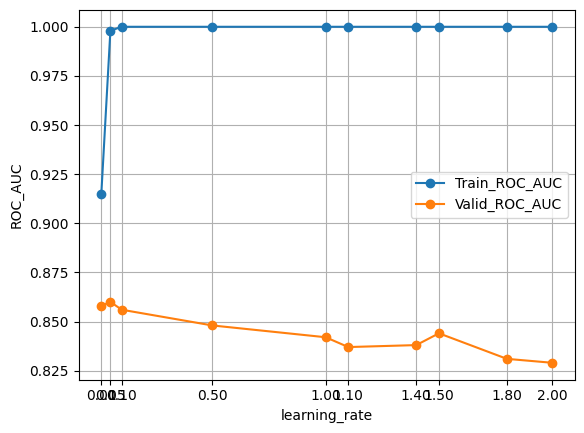

In [179]:
plt.plot(learning_rate, scores_CB1['train'], label = 'Train_ROC_AUC', marker = 'o')
plt.plot(learning_rate, scores_CB1['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('learning_rate')
plt.ylabel('ROC_AUC')
plt.xticks(learning_rate)
plt.grid()
plt.legend()
plt.show()

In [147]:

#create an empty list to store iterations
iterations = []

#createa an empty dictionary to store the scores

scores_CB2 = { 'train': [],
             'valid': []
              }

#make iterations over iterations
for k in range(2,22,2):
  print(f'iterations: {k}')

  #append the values of iterations in to the list
  iterations.append(k)

  #build the forest
  CB_class2 = CatBoostClassifier(iterations= k)

  #fit, predict, and score the training set
  CB_class2.fit(X_train, y_train['__churn'])
  value_for_train = CB_class2.predict(X_train)
  value_for_train[value_for_train <0] = 0
  score_CB2 = metric_for_churn(y_true= y_train['__churn'], y_score=value_for_train)
  scores_CB2['train'].append(score_CB2)

  #predict, and score the validation set
  value_for_valid = CB_class2.predict(X_valid)
  value_for_valid[value_for_valid <0] = 0
  score_CB2 = metric_for_churn( y_true= y_valid['__churn'], y_score= value_for_valid)
  scores_CB2['valid'].append(score_CB2)

  print(f'Train_AUC: {score_CB2}')
  print(f'Valid_AUC: {score_CB2}')
  print('\n')

iterations: 2
Learning rate set to 0.5
0:	learn: 0.2502929	total: 13.4ms	remaining: 13.4ms
1:	learn: 0.1882711	total: 25.7ms	remaining: 0us
Train_AUC: 0.825
Valid_AUC: 0.825


iterations: 4
Learning rate set to 0.5
0:	learn: 0.2502929	total: 12.1ms	remaining: 36.2ms
1:	learn: 0.1882711	total: 26.5ms	remaining: 26.5ms
2:	learn: 0.1710849	total: 39.4ms	remaining: 13.1ms
3:	learn: 0.1586102	total: 52ms	remaining: 0us
Train_AUC: 0.847
Valid_AUC: 0.847


iterations: 6
Learning rate set to 0.5
0:	learn: 0.2502929	total: 23.4ms	remaining: 117ms
1:	learn: 0.1882711	total: 50.5ms	remaining: 101ms
2:	learn: 0.1710849	total: 67.1ms	remaining: 67.1ms
3:	learn: 0.1586102	total: 93.9ms	remaining: 46.9ms
4:	learn: 0.1498979	total: 117ms	remaining: 23.5ms
5:	learn: 0.1454493	total: 146ms	remaining: 0us
Train_AUC: 0.849
Valid_AUC: 0.849


iterations: 8
Learning rate set to 0.5
0:	learn: 0.2502929	total: 28.5ms	remaining: 199ms
1:	learn: 0.1882711	total: 54.2ms	remaining: 163ms
2:	learn: 0.1710849	total

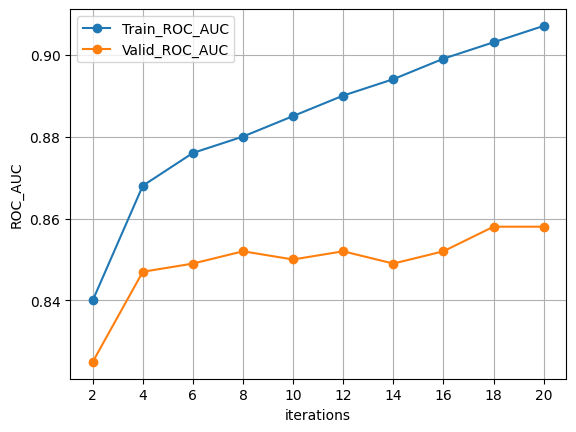

In [148]:
plt.plot(iterations, scores_CB2['train'], label = 'Train_ROC_AUC', marker = 'o')
plt.plot(iterations, scores_CB2['valid'], label = 'Valid_ROC_AUC', marker = 'o')
plt.xlabel('iterations')
plt.ylabel('ROC_AUC')
plt.xticks(iterations)
plt.grid()
plt.legend()
plt.show()

In [183]:
#Best model for Best CatBoost model Classifier

#select the training data
name, X_, y_ = get_X_y[0]

#create a range for the hyperparameters max_depth and other

#build the forest
CB_class_best = CatBoostClassifier(max_depth=11, learning_rate= 0.05, iterations = 10  )

#fit the model
CB_class_best.fit(X_, y_['__churn'])

#make predictions
for name, X_, y_ in get_X_y:
  value = CB_class_best.predict(X_)
 #convert all negative predictions to zero
  value[value < 0] = 0
    #append the values of the prediction
  y_['__price_pedict_class_best_CB'] = value

for name, X_, y_ in get_X_y:
  score = metric_for_churn(y_true = y_['__churn'], y_score = y_['__price_pedict_class_best_CB'])
  print(f'{name:10s}: {score:.4f}')

0:	learn: 0.6051038	total: 166ms	remaining: 1.49s
1:	learn: 0.5387052	total: 442ms	remaining: 1.77s
2:	learn: 0.4814782	total: 754ms	remaining: 1.76s
3:	learn: 0.4377467	total: 1.16s	remaining: 1.74s
4:	learn: 0.3960646	total: 1.49s	remaining: 1.49s
5:	learn: 0.3633636	total: 1.79s	remaining: 1.19s
6:	learn: 0.3327201	total: 2.21s	remaining: 949ms
7:	learn: 0.3101382	total: 2.72s	remaining: 680ms
8:	learn: 0.2903302	total: 3.21s	remaining: 356ms
9:	learn: 0.2733709	total: 3.24s	remaining: 0us
train     : 0.8800
valid     : 0.8400


<Axes: >

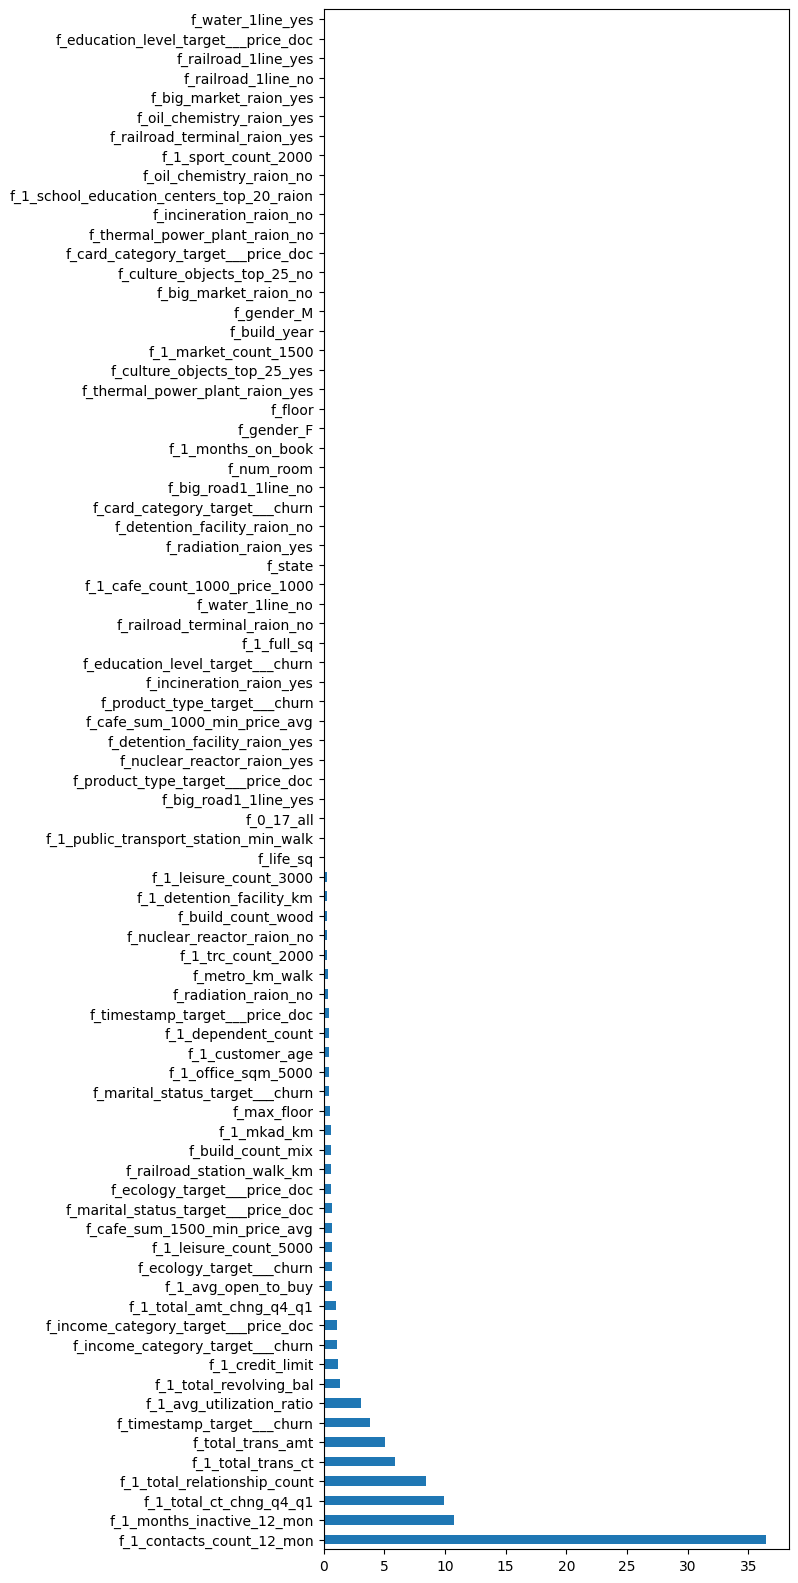

In [210]:
CB_class_best_importances = (pd.Series(CB_class_best.feature_importances_, index = X_train.columns.tolist()).sort_values(ascending = False).round(4))
CB_class_best_importances.plot(kind = 'barh', figsize=(6, 20))

**FIT THE BEST MODELS AND PREDICT **

Best regression regression model: CatBoost {random_state=47, max_depth = 7, learning_rate = 0.05 }
Best classification: XGBoost {random_state= 47, max_depth=3, learning_rate = 0.1 }

In [8]:
#create a list to store the train_all and test data
get_X_y_test = [
    ('train_all', X_train_all, train_all),
    ('test', X_test, test)
]

In [12]:
#The best regression model: CATBOOST
from catboost import CatBoostRegressor

#get training data
name, X_, y_ = get_X_y_test[0]

#build the model
CB_reg = CatBoostRegressor(random_state=47, max_depth = 7, learning_rate = 0.05 )

#fit the model
CB_reg.fit(X_, y_['__price_doc'])

#make predictions
for name, X_, y_ in get_X_y_test:
  value = CB_reg.predict(X_)
 #convert all negative predictions to zero
  value[value < 0] = 0
    #append the values of the prediction
  y_['__price_predict'] = value

0:	learn: 4.4232011	total: 50.5ms	remaining: 50.5s
1:	learn: 4.3195352	total: 87.7ms	remaining: 43.7s
2:	learn: 4.2170435	total: 126ms	remaining: 41.8s
3:	learn: 4.1231814	total: 164ms	remaining: 40.9s
4:	learn: 4.0398752	total: 193ms	remaining: 38.3s
5:	learn: 3.9614679	total: 217ms	remaining: 36s
6:	learn: 3.8878312	total: 262ms	remaining: 37.2s
7:	learn: 3.8173789	total: 303ms	remaining: 37.6s
8:	learn: 3.7521223	total: 347ms	remaining: 38.2s
9:	learn: 3.6877216	total: 396ms	remaining: 39.2s
10:	learn: 3.6311504	total: 436ms	remaining: 39.2s
11:	learn: 3.5785322	total: 482ms	remaining: 39.7s
12:	learn: 3.5317688	total: 512ms	remaining: 38.9s
13:	learn: 3.4860854	total: 543ms	remaining: 38.2s
14:	learn: 3.4396913	total: 586ms	remaining: 38.5s
15:	learn: 3.3969088	total: 639ms	remaining: 39.3s
16:	learn: 3.3577031	total: 685ms	remaining: 39.6s
17:	learn: 3.3172296	total: 731ms	remaining: 39.9s
18:	learn: 3.2826500	total: 774ms	remaining: 40s
19:	learn: 3.2494217	total: 818ms	remaining

In [25]:
#Best Classification model: XGBOOST

#select the training data
name, X_, y_ = get_X_y_test[0]

#create a range for the hyperparameters max_depth and other

#build the forest
XGB_class_best = XGBClassifier(random_state= 47, max_depth=3, learning_rate = 0.1 )

#fit the model
XGB_class_best.fit(X_, y_['__churn'])

#make predictions
for name, X_, y_ in get_X_y_test:
  prob = XGB_class_best.predict_proba(X_)
  y_['__churn_prob'] = prob[:,1]

  y_['__churn_threshold'] = 0.5
  y_['__churn_pred'] = (y_['__churn_prob'] > y_['__churn_threshold']).astype(int)

# YOUR WORK IS DONE (Create submission)

In [27]:
metric_for_churn(y_train_all_churn, train_all['__churn_prob'])

0.979

In [28]:
metric_for_price(y_train_all_price, train_all['__price_predict'])

-0.1

In [29]:
def alg1(x):
    """
    Algorithm version 1
    """
    return x['__price_predict']

# column __price_predict must be in train and test dataset
train_all['__priority'] = train_all.apply(alg1, axis=1)
test['__priority'] = test.apply(alg1, axis=1)

In [31]:
# this columns must be in dataset
prediction_columns = ['__price_predict', '__churn_prob', '__priority']

if train_all.shape[0] != TRAIN_SHAPE[0]:
    raise ValueError(f'Incorrect train file shape. Original {TRAIN_SHAPE[0]}. {train_all.shape[0]} are given')

for col in prediction_columns:
    if col not in train_all.columns.tolist():
        raise ValueError(f"{col} does not exist in train dataset")

# index must be True
train_all.to_csv('/content/3_' + NAME + '_train_all.csv', index=True)

if test.shape[0] != TEST_SHAPE[0]:
    raise ValueError(f'Incorrect test file shape. Original {TEST_SHAPE[0]}. {test.shape[0]} are given')

for col in prediction_columns:
    if col not in test.columns.tolist():
        raise ValueError(f"{col} does not exist in test dataset")

# index must be True
test.to_csv('/content/3_' + NAME + '_test.csv', index=True)
print(train_all.shape, test.shape)

(20483, 133) (9183, 132)
